> ## Week 2: Data Exploration and Visualization 

In [2]:
# import all necessary libraries
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# ggplot style sheet
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [3]:
pwd

'C:\\Users\\Andy Joseph\\Documents\\3Signet\\EDA_dropout_prediction'

In [4]:
df1 = pd.read_csv('students_dropout.csv')
df1.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [5]:
df1.shape

(4424, 37)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [7]:
df1.rename(columns={'Nacionality': 'Nationality'}, inplace=True)
df1.head(1)

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   

   Previous qualification (grade)  Nationality  Mother's qualification  \
0                           122.0            1                      19   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   

   Curricular units 2nd sem (evaluations)  \
0                                       0   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                               0.0   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   

   Inflation rate   GDP   Target  
0             1.4  1.74  Dropout  

[1 rows x 37 columns]

In [8]:
df1['Admission grade'].describe()

count    4424.000000
mean      126.978119
std        14.482001
min        95.000000
25%       117.900000
50%       126.100000
75%       134.800000
max       190.000000
Name: Admission grade, dtype: float64

In [9]:
bins = [df1['Admission grade'].min(), 117.9, 126.1, 134.8, df1['Admission grade'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
df1['Admission_grade_category'] = pd.cut(df1['Admission grade'], bins=bins, labels=labels)

In [10]:
df1['Curricular units 1st sem (grade)'].describe()

count    4424.000000
mean       10.640822
std         4.843663
min         0.000000
25%        11.000000
50%        12.285714
75%        13.400000
max        18.875000
Name: Curricular units 1st sem (grade), dtype: float64

In [11]:
df1['Curricular units 2nd sem (grade)'].describe()

count    4424.000000
mean       10.230206
std         5.210808
min         0.000000
25%        10.750000
50%        12.200000
75%        13.333333
max        18.571429
Name: Curricular units 2nd sem (grade), dtype: float64

In [12]:
# Define bins based on descriptive statistics
def categorize_grades(df, column_name):
    # Calculate quantiles
    q25 = df[column_name].quantile(0.25)
    q75 = df[column_name].quantile(0.75)
    
    # Define bins
    bins = [df[column_name].min(), q25, q75, df[column_name].max()]
    labels = ['Low', 'Medium', 'High']
    
    # Categorize the column
    df[f'{column_name}_category'] = pd.cut(df[column_name], bins=bins, labels=labels, include_lowest=True)

# Categorize both columns
categorize_grades(df1, 'Curricular units 1st sem (grade)')
categorize_grades(df1, 'Curricular units 2nd sem (grade)')

In [13]:
df1.head(1)

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   

   Previous qualification (grade)  Nationality  Mother's qualification  \
0                           122.0            1                      19   

   Father's qualification  ...  Curricular units 2nd sem (approved)  \
0                      12  ...                                    0   

   Curricular units 2nd sem (grade)  \
0                               0.0   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   

   Inflation rate   GDP   Target  Admission_grade_category  \
0             1.4  1.74  Dropout                      High   

   Curricular units 1st sem (grade)_category  \
0                                        Low   

   Curricular units 2nd sem (grade)_category  
0                                        Low  

[1 rows x 40 columns]

In [14]:
df1['Unemployment rate'].describe()

count    4424.000000
mean       11.566139
std         2.663850
min         7.600000
25%         9.400000
50%        11.100000
75%        13.900000
max        16.200000
Name: Unemployment rate, dtype: float64

In [15]:
# Set the threshold based on the median
unemployment_threshold = 11.1

# Categorize Unemployment rate into 'high' and 'low'
df1['Unemployment_rate_category'] = df1['Unemployment rate'].apply(lambda x: 'high' if x > unemployment_threshold else 'low')

In [16]:
df1['Inflation rate'].describe()

count    4424.000000
mean        1.228029
std         1.382711
min        -0.800000
25%         0.300000
50%         1.400000
75%         2.600000
max         3.700000
Name: Inflation rate, dtype: float64

In [17]:
# Set the threshold based on the median
inflation_threshold = 1.4

# Categorize Inflation rate into 'high' and 'low'
df1['Inflation_rate_category'] = df1['Inflation rate'].apply(lambda x: 'high' if x > inflation_threshold else 'low')

In [18]:
df1['GDP'].describe()

count    4424.000000
mean        0.001969
std         2.269935
min        -4.060000
25%        -1.700000
50%         0.320000
75%         1.790000
max         3.510000
Name: GDP, dtype: float64

In [19]:
# Set the threshold based on the median
gdp_threshold = 0.32

# Categorize GDP into 'high' and 'low'
df1['GDP_category'] = df1['GDP'].apply(lambda x: 'high' if x > gdp_threshold else 'low')

In [20]:
df1['Age at enrollment'].describe()

count    4424.000000
mean       23.265145
std         7.587816
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: Age at enrollment, dtype: float64

In [21]:
# Define age ranges
bins = [df1['Age at enrollment'].min(), 20, 25, df1['Age at enrollment'].max()]
labels = ['Young', 'Middle-aged', 'Older']

# Categorize Age at enrollment, ensuring all values are included
df1['Age_category'] = pd.cut(df1['Age at enrollment'], bins=bins, labels=labels, right=False, include_lowest=True)

# Check unique values in Age_category
print(df1['Age_category'].unique())

['Middle-aged', 'Young', 'Older', NaN]
Categories (3, object): ['Young' < 'Middle-aged' < 'Older']


In [22]:
df1['Curricular units 1st sem (credited)'].unique()

array([ 0,  2,  3,  6,  7, 13,  4,  1,  5, 19, 11,  8, 10,  9, 15, 12, 14,
       18, 17, 16, 20], dtype=int64)

In [23]:
df1.head(2)

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   

   Previous qualification (grade)  Nationality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   

   Father's qualification  ...  Inflation rate   GDP    Target  \
0                      12  ...             1.4  1.74   Dropout   
1                       3  ...            -0.3  0.79  Graduate   

   Admission_grade_category  Curricular units 1st sem (grade)_category  \
0                      High                                        Low   
1                 Very High                                       High   

   Curricular units 2nd sem (grade)_category  Unemployment_rate_category  \
0                                        Low                         low   
1                                       High                        high   

   Inflation_rate_category  GDP_category  Age_category  
0                      low          high   Middle-aged  
1                      low          high         Young  

[2 rows x 44 columns]

In [24]:
df2 = df1.copy()
df2.head(2)

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   

   Previous qualification (grade)  Nationality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   

   Father's qualification  ...  Inflation rate   GDP    Target  \
0                      12  ...             1.4  1.74   Dropout   
1                       3  ...            -0.3  0.79  Graduate   

   Admission_grade_category  Curricular units 1st sem (grade)_category  \
0                      High                                        Low   
1                 Very High                                       High   

   Curricular units 2nd sem (grade)_category  Unemployment_rate_category  \
0                                        Low                         low   
1                                       High                        high   

   Inflation_rate_category  GDP_category  Age_category  
0                      low          high   Middle-aged  
1                      low          high         Young  

[2 rows x 44 columns]

### ****Univariate Analysis****

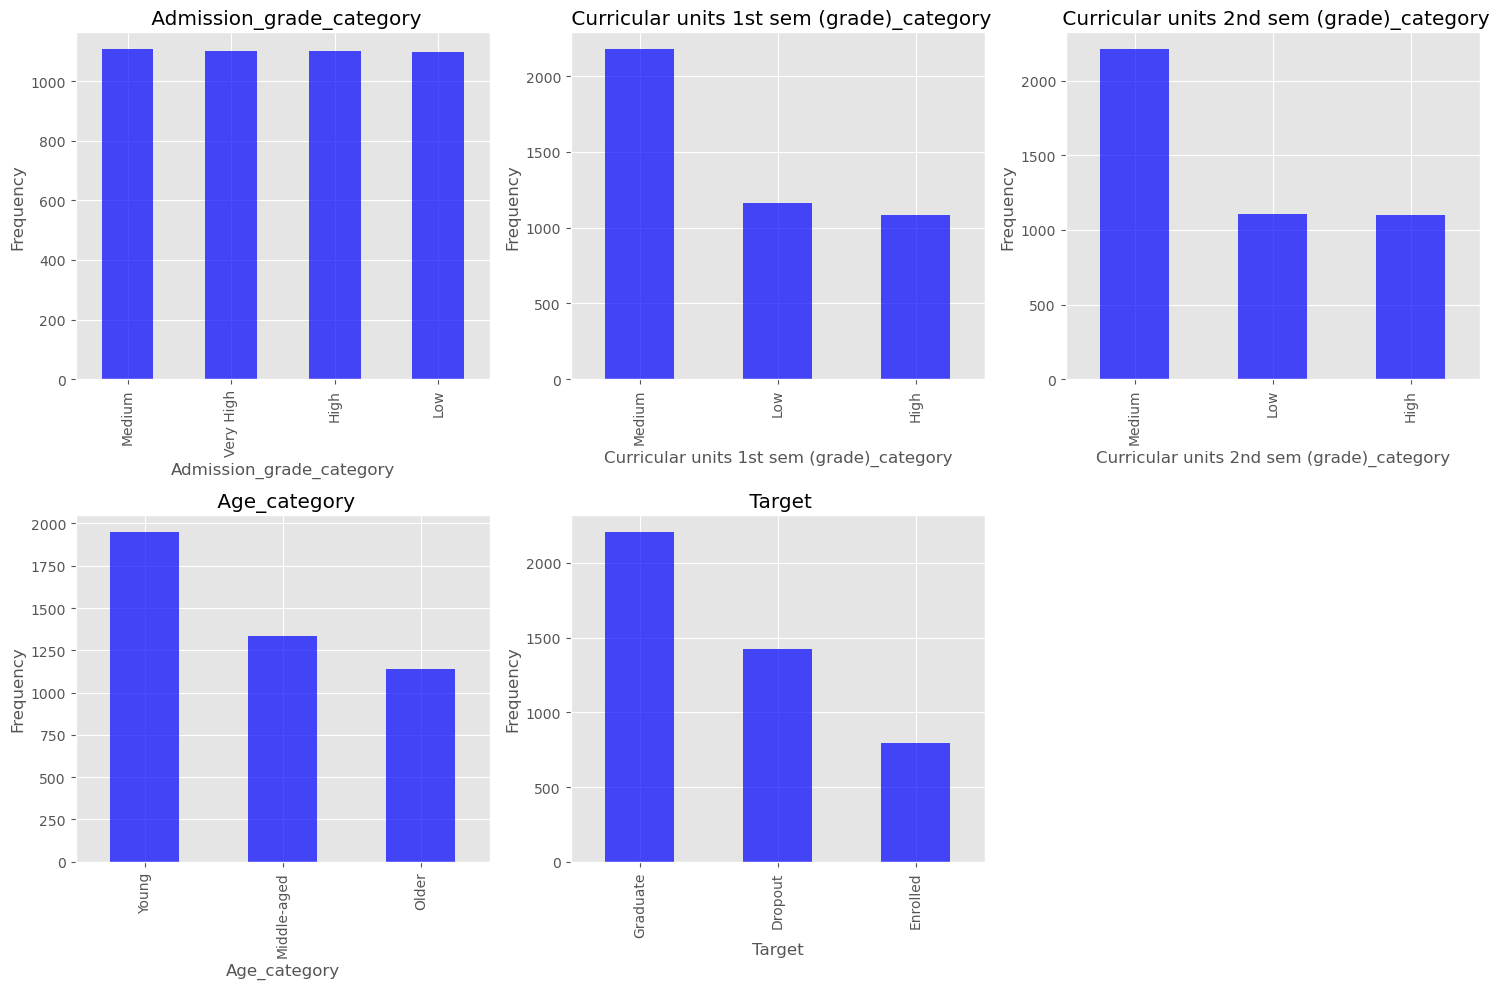

In [25]:
# Select categorical columns and include 'Target'
cat_cols = df2.select_dtypes(include='category').columns.tolist()

# Add 'Target' to the list if it's not already included
if 'Target' not in cat_cols:
    cat_cols.append('Target')

n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot bar plots for each categorical column
for i, col in enumerate(cat_cols):
    df2[col].value_counts().plot(kind='bar', ax=axes[i], alpha=0.7, color='blue')
    axes[i].set_title(f' {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

>****This analysis focuses on predicting student dropout rates using a dataset that categorizes students by **Admission Grade**, **Curricular Units** for both semesters, **Age**, and **Target** outcomes. Most students fall into the **Medium** category for admission grades and curricular units, indicating stable performance. The **Young** age group is predominant, and a significant number are classified as **Graduates**, which reflects a successful graduation rate. These insights are crucial for developing strategies to reduce dropout rates and improve student retention.****



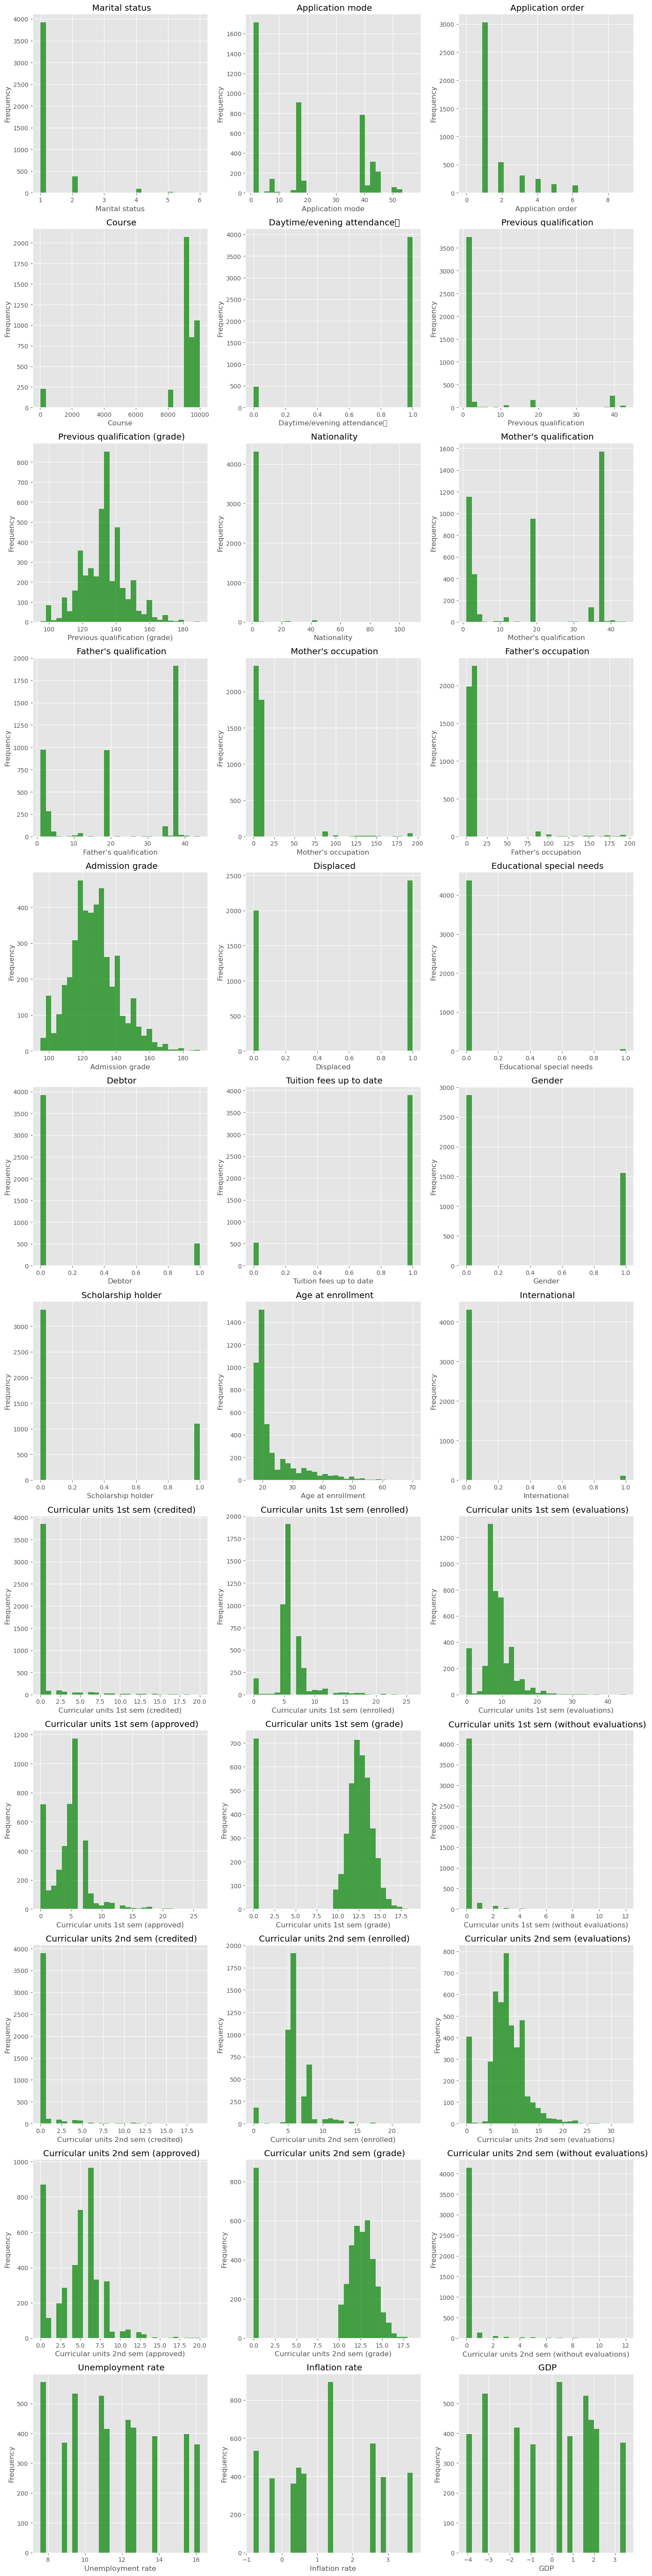

In [26]:
num_cols = df2.select_dtypes(include='number').columns
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot histograms for each numerical column
for i, col in enumerate(num_cols):
    axes[i].hist(df2[col], bins=30, alpha=0.7, color='green')
    axes[i].set_title(f' {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### Overview
The dataset includes various attributes related to students, such as demographics, academic qualifications, and socioeconomic factors, visualized through histograms.

#### Key Insights

1. **Demographic Distribution**:
   - **Marital Status**: Reveals the majority status among students (single, married).
   - **Nationality**: Highlights diversity within the student population.

2. **Academic Performance**:
   - **Admission Grades**: Indicates competitiveness; a right-skewed distribution suggests high grades.
   - **Curricular Units**: Reflects student engagement and course load across semesters.

3. **Socioeconomic Factors**:
   - **Parental Occupation**: Provides insights into students' socioeconomic backgrounds.
   - **Scholarship Holders**: Indicates financial support and its impact on education.

4. **Behavioral Patterns**:
   - **Class Attendance**: Helps understand preferences for daytime vs. evening classes.
   - **Displacement and Special Needs**: Highlights challenges faced by specific groups.

5. **Economic Indicators**:
   - **Unemployment and Inflation Rates**: Contextualizes the economic environment affecting students.
t affecting students.
```

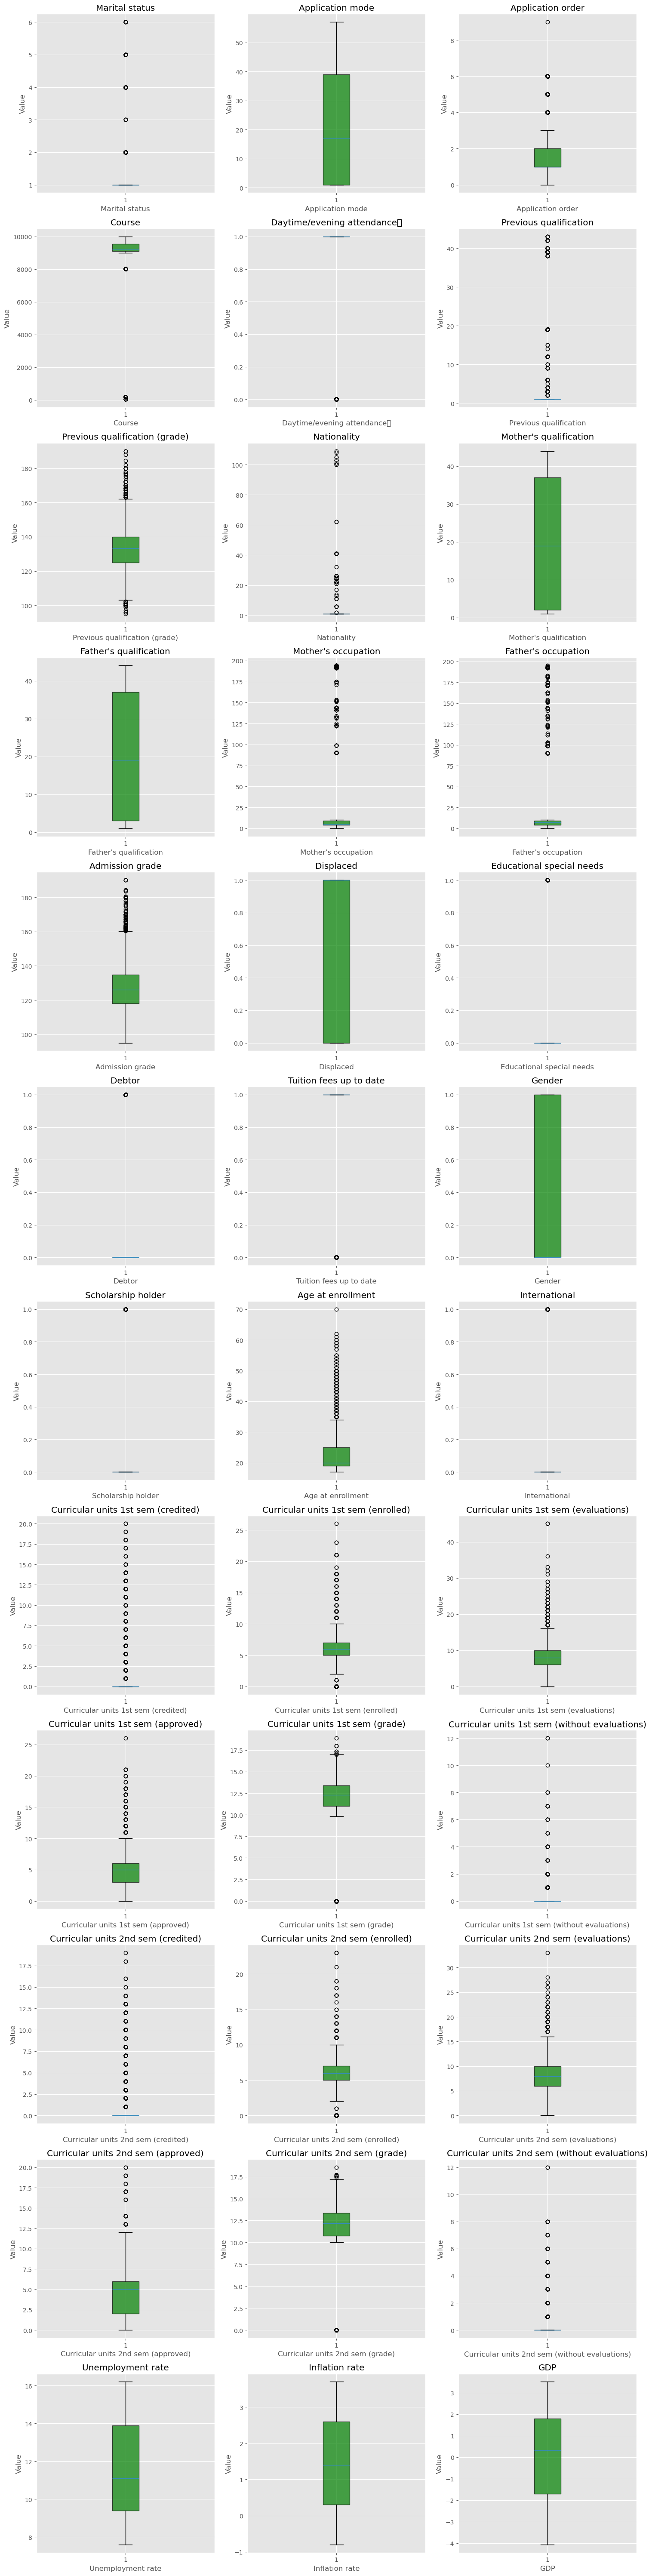

In [27]:
import matplotlib.pyplot as plt

num_cols = df2.select_dtypes(include='number').columns
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot box plots for each numerical column
for i, col in enumerate(num_cols):
    axes[i].boxplot(df2[col], patch_artist=True, boxprops=dict(facecolor='green', alpha=0.7))
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Value')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

> **This analysis explores factors influencing student performance and their potential link to dropout rates. It highlights that variability in admission grades and diverse academic backgrounds can impact student retention. Additionally, higher GDP and lower unemployment indicate economic stability is associated with better performance, suggesting that these conditions may help reduce dropout rates.**
.


#### ****Statistical Analysis****

In [28]:
df1.describe().T.astype(int)

count  mean   std  min   25%  \
Marital status                                   4424     1     0    1     1   
Application mode                                 4424    18    17    1     1   
Application order                                4424     1     1    0     1   
Course                                           4424  8856  2063   33  9085   
Daytime/evening attendance\t                     4424     0     0    0     1   
Previous qualification                           4424     4    10    1     1   
Previous qualification (grade)                   4424   132    13   95   125   
Nationality                                      4424     1     6    1     1   
Mother's qualification                           4424    19    15    1     2   
Father's qualification                           4424    22    15    1     3   
Mother's occupation                              4424    10    26    0     4   
Father's occupation                              4424    11    25    0     4   
Admission grade                                  4424   126    14   95   117   
Displaced                                        4424     0     0    0     0   
Educational special needs                        4424     0     0    0     0   
Debtor                                           4424     0     0    0     0   
Tuition fees up to date                          4424     0     0    0     1   
Gender                                           4424     0     0    0     0   
Scholarship holder                               4424     0     0    0     0   
Age at enrollment                                4424    23     7   17    19   
International                                    4424     0     0    0     0   
Curricular units 1st sem (credited)              4424     0     2    0     0   
Curricular units 1st sem (enrolled)              4424     6     2    0     5   
Curricular units 1st sem (evaluations)           4424     8     4    0     6   
Curricular units 1st sem (approved)              4424     4     3    0     3   
Curricular units 1st sem (grade)                 4424    10     4    0    11   
Curricular units 1st sem (without evaluations)   4424     0     0    0     0   
Curricular units 2nd sem (credited)              4424     0     1    0     0   
Curricular units 2nd sem (enrolled)              4424     6     2    0     5   
Curricular units 2nd sem (evaluations)           4424     8     3    0     6   
Curricular units 2nd sem (approved)              4424     4     3    0     2   
Curricular units 2nd sem (grade)                 4424    10     5    0    10   
Curricular units 2nd sem (without evaluations)   4424     0     0    0     0   
Unemployment rate                                4424    11     2    7     9   
Inflation rate                                   4424     1     1    0     0   
GDP                                              4424     0     2   -4    -1   

                                                 50%   75%   max  
Marital status                                     1     1     6  
Application mode                                  17    39    57  
Application order                                  1     2     9  
Course                                          9238  9556  9991  
Daytime/evening attendance\t                       1     1     1  
Previous qualification                             1     1    43  
Previous qualification (grade)                   133   140   190  
Nationality                                        1     1   109  
Mother's qualification                            19    37    44  
Father's qualification                            19    37    44  
Mother's occupation                                5     9   194  
Father's occupation                                7     9   195  
Admission grade                                  126   134   190  
Displaced                                          1     1     1  
Educational special needs                          0     0     1  
Debtor         

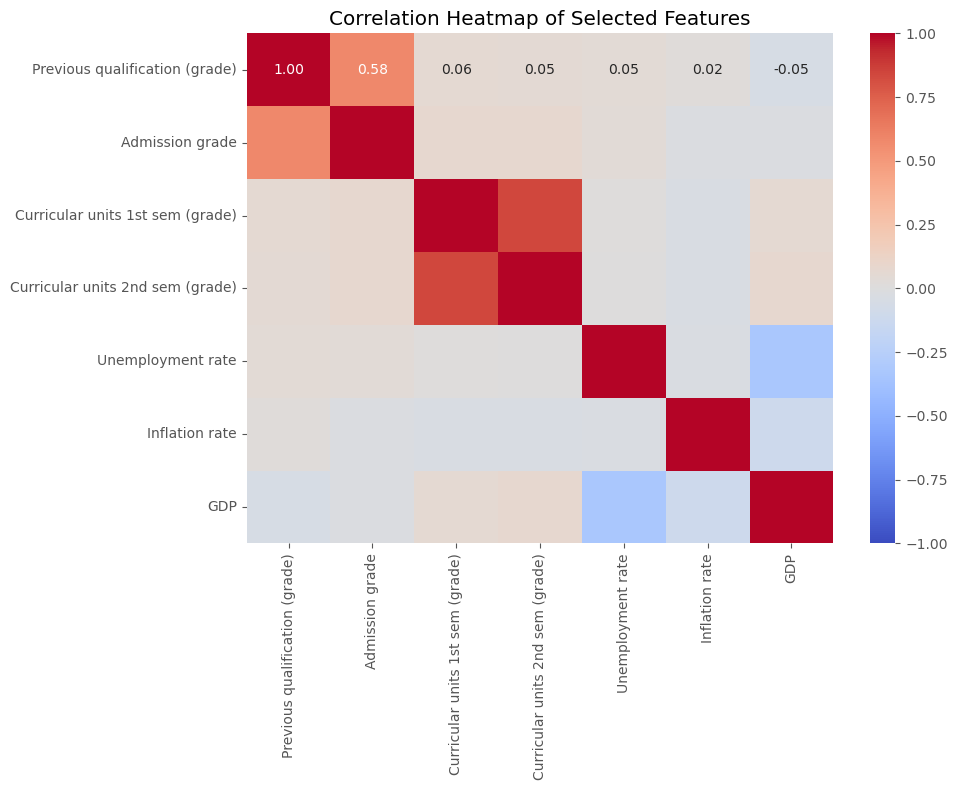

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for the heatmap
cols = [
    'Previous qualification (grade)', 
    'Admission grade', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (grade)', 
    'Unemployment rate', 
    'Inflation rate', 
    'GDP'
]

# Create a correlation matrix
corr_matrix = df2[cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Set title
plt.title('Correlation Heatmap of Selected Features')

# Show the plot
plt.tight_layout()
plt.show()

### ****Bivariate Analysis****

#### ****Numerical Vs Numerical****

In [30]:
admgrd_cur1stsem = df2.groupby('Admission grade')['Curricular units 1st sem (grade)'].mean().reset_index()
admgrd_cur1stsem.head()

Admission grade  Curricular units 1st sem (grade)
0             95.0                          7.665606
1             95.1                          0.000000
2             95.5                          6.000000
3             95.8                          0.000000
4             96.0                          6.840578

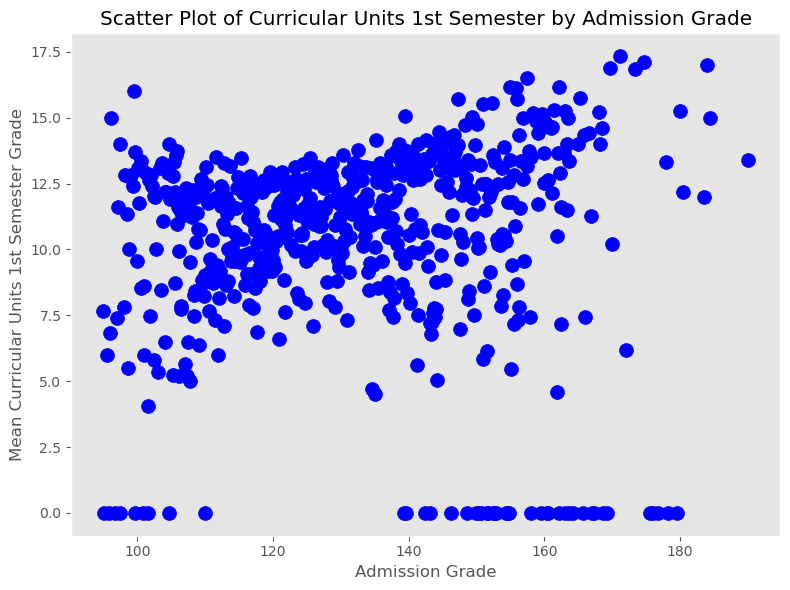

In [31]:
# Creating a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(admgrd_cur1stsem['Admission grade'], admgrd_cur1stsem['Curricular units 1st sem (grade)'], color='blue', s=100)

# Adding titles and labels
plt.title('Scatter Plot of Curricular Units 1st Semester by Admission Grade')
plt.xlabel('Admission Grade')
plt.ylabel('Mean Curricular Units 1st Semester Grade')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

>***The scatter plot reveals a positive correlation between **Admission Grade** and **Mean Curricular Units for the 1st Semester**, indicating that higher admission grades generally lead to better academic performance. Most students fall within the lower admission grade range (100-140), with fewer achieving higher grades. Outliers at lower curricular unit scores suggest some students struggled despite varying admission grades. This analysis underscores the need for targeted academic support for students with lower admission grades to enhance their success.***


In [32]:
admgrd_prequa = df2.groupby('Admission grade')['Previous qualification'].mean().reset_index()
admgrd_prequa.head()

Admission grade  Previous qualification
0             95.0                2.636364
1             95.1               12.000000
2             95.5               19.500000
3             95.8                1.000000
4             96.0                3.571429

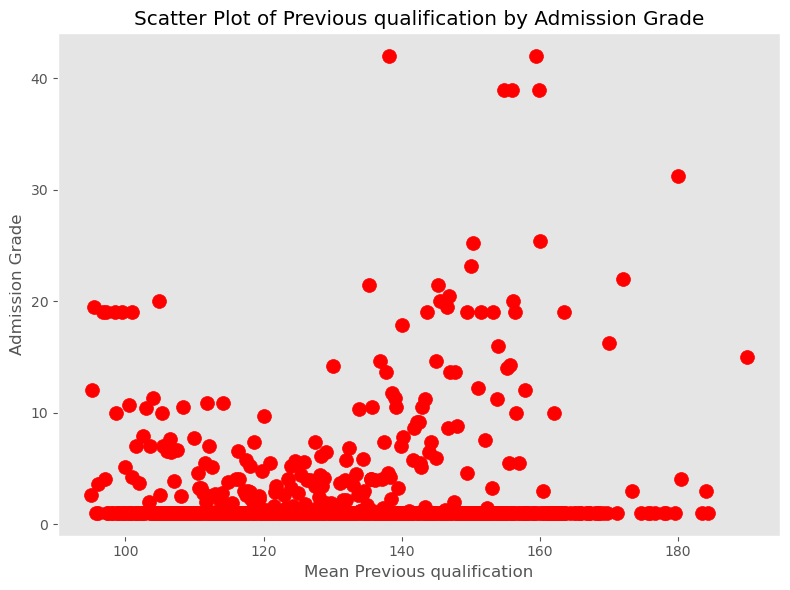

In [33]:
# Creating a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(admgrd_prequa['Admission grade'], admgrd_prequa['Previous qualification'], color='red', s=100)

# Adding titles and labels
plt.title('Scatter Plot of Previous qualification by Admission Grade')
plt.xlabel('Mean Previous qualification')
plt.ylabel('Admission Grade')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

>*****The correlation between previous qualification grades and admission grades can influence dropout rates significantly. Higher admission grades often indicate better preparedness, leading to lower dropout likelihood. Students with strong grades may also have increased confidence and engagement. Conversely, those with lower qualifications but high admission grades may need additional support; without it, they could be at a higher risk of dropping out. Recognizing these dynamics can help institutions implement targeted interventions to improve retention rates.*****


In [34]:
unemrate_inflatnrate = df2.groupby('Unemployment rate')['Inflation rate'].mean().reset_index()
unemrate_inflatnrate.head()

Unemployment rate  Inflation rate
0                7.6             2.6
1                8.9             1.4
2                9.4            -0.8
3               10.8             1.4
4               11.1             0.6

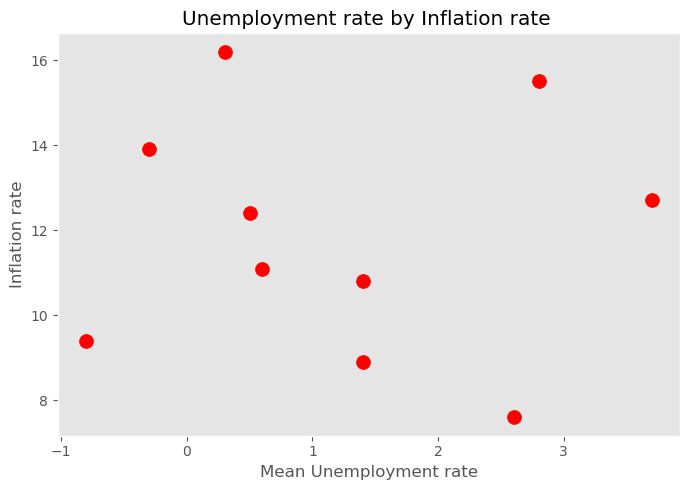

In [35]:
# Creating a scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(unemrate_inflatnrate['Inflation rate'], unemrate_inflatnrate['Unemployment rate'], color='red', s=100)

# Adding titles and labels
plt.title('Unemployment rate by Inflation rate ')
plt.xlabel('Mean Unemployment rate')
plt.ylabel('Inflation rate')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

>*****The scatter plot shows that the relationship between unemployment and inflation rates is complex, with no clear linear correlation. This suggests that multiple factors influence both economic conditions and dropout rates. Economic instability can reduce student motivation and lead to financial strain, forcing families to prioritize immediate needs over education. Policymakers should consider these connections to develop targeted interventions that support at-risk students during challenging economic times.*****


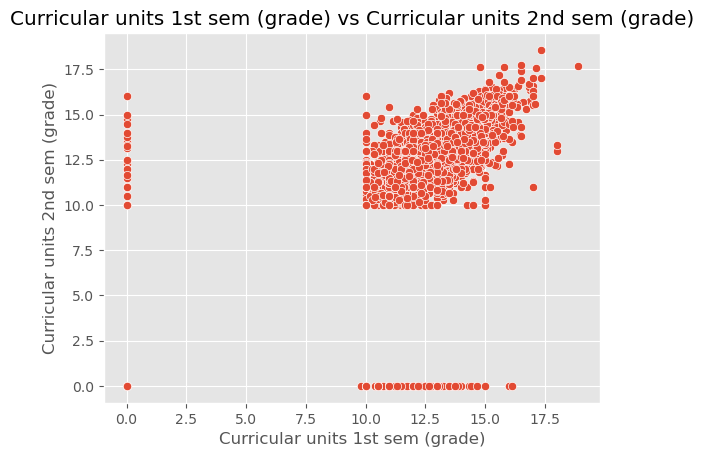

In [36]:
sns.scatterplot(x='Curricular units 1st sem (grade)', y='Curricular units 2nd sem (grade)', data=df2)
plt.title('Curricular units 1st sem (grade) vs Curricular units 2nd sem (grade)')
plt.show()

> *****The scatter plot reveals a positive correlation between grades in the first and second semesters, suggesting that students who perform well initially are likely to continue succeeding. This trend is crucial when considering dropout rates; students with lower grades may feel discouraged and be at a higher risk of dropping out. The clustering of data points in the mid to high range indicates that consistent academic support could help at-risk students improve their performance, thereby reducing dropout rates. Early intervention for struggling students is essential to foster retention and success in their educational journeys.*****


#### ****Numerical vs Categorical****

In [37]:
df2['Admission grade'].unique()

array([127.3, 142.5, 124.8, 119.6, 141.5, 114.8, 128.4, 113.1, 129.3,
       123. , 130.6, 119.3, 130.2, 111.8, 137.1, 120.7, 137.4, 136.3,
       124.6, 120.3, 121.8, 125.5, 114.9, 123.9, 157. , 116.4, 131. ,
       122.1, 118.8, 150. , 130. , 138.8, 134.5, 131.4, 102.5, 128.8,
       122.9, 113.9, 120. , 121.1, 120.4, 100.6, 121.4, 109.7, 134.1,
       127.6, 132.4, 133.4, 126.1, 113.5, 121.3, 159.3, 129.1, 155.3,
       139.8, 115.2, 131.9, 126. , 120.9, 128.2, 120.1, 100. , 134. ,
       130.8, 135.8, 111.7, 132.9, 115.5, 106. , 117. , 110.2, 155.7,
       180.4, 110. , 161. , 117.6, 128.7, 112.2, 100.8, 105. , 114. ,
       137. , 124.9, 134.3, 111.5, 160. , 117.4, 122.2, 118.2, 106.7,
       108.2, 107. , 136.1, 115.3, 140.4, 113.4, 118.6, 122.3, 127.9,
       117.1, 145.3, 122.6, 128. , 123.7, 131.7, 133.2, 109.3, 113. ,
       157.9, 112.1, 174.7, 110.1,  99.7, 121. , 119.1, 124.7, 117.2,
       131.5, 121.7, 123.4, 132.8, 108.7, 138.1, 126.5, 127.4, 123.6,
       122. , 125.8,

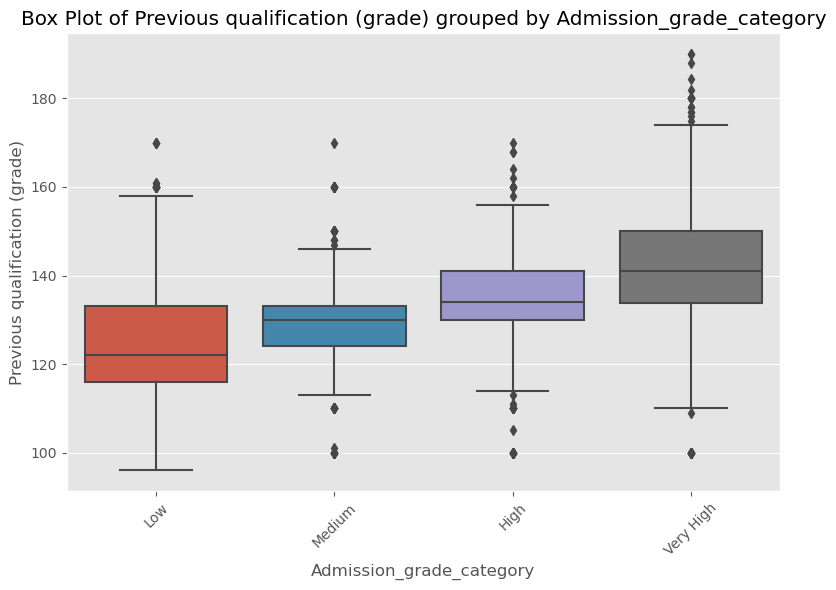

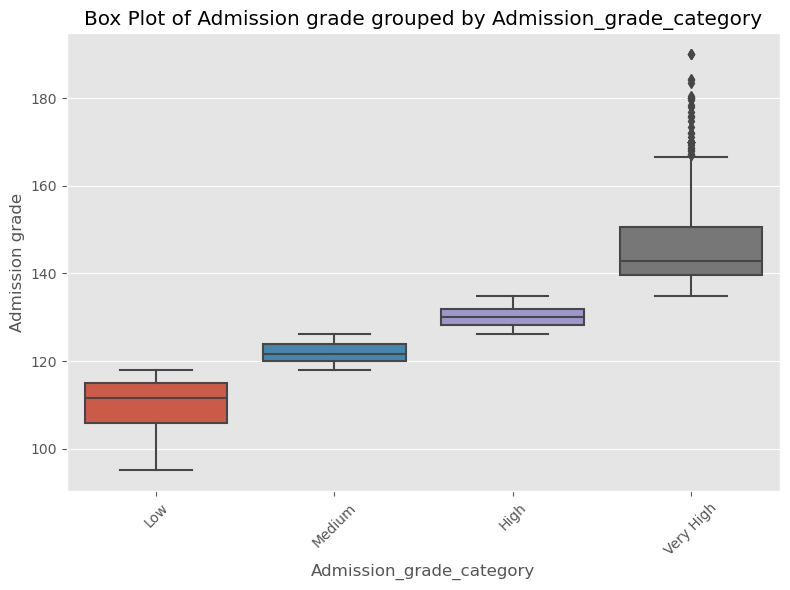

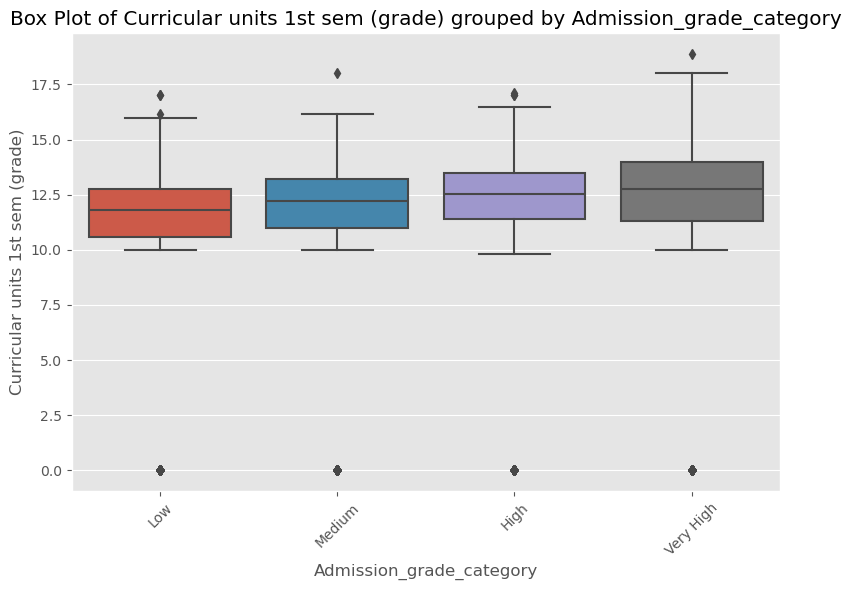

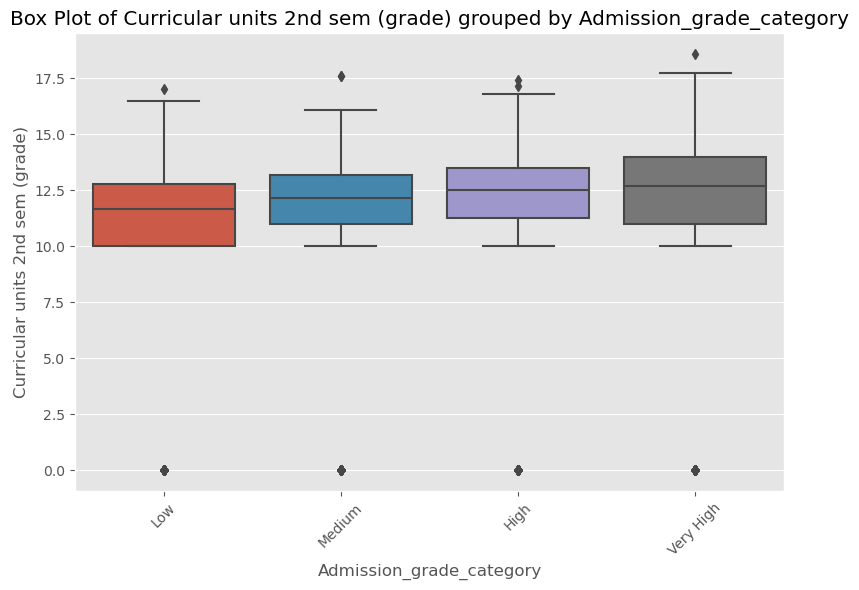

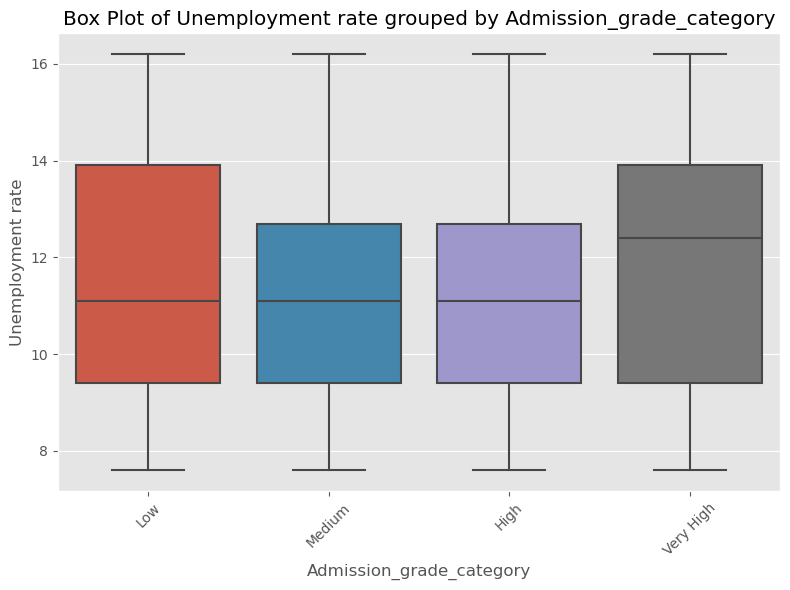

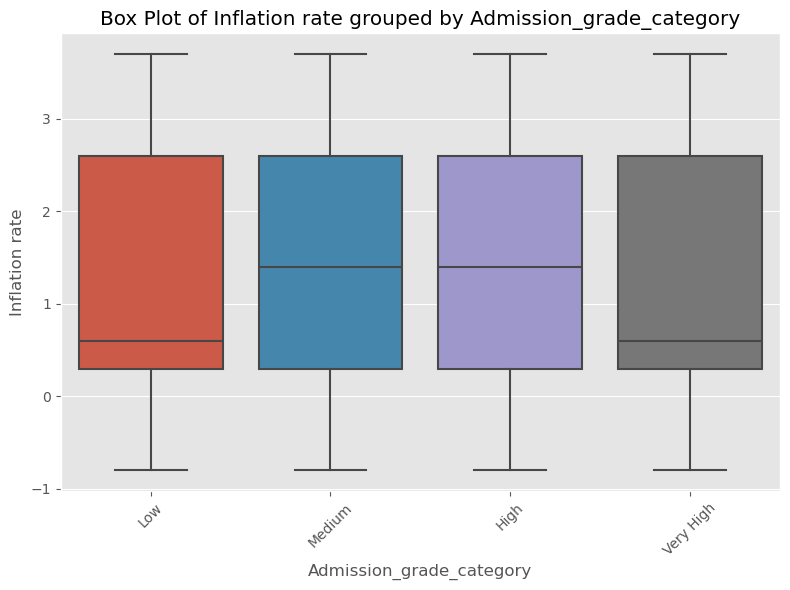

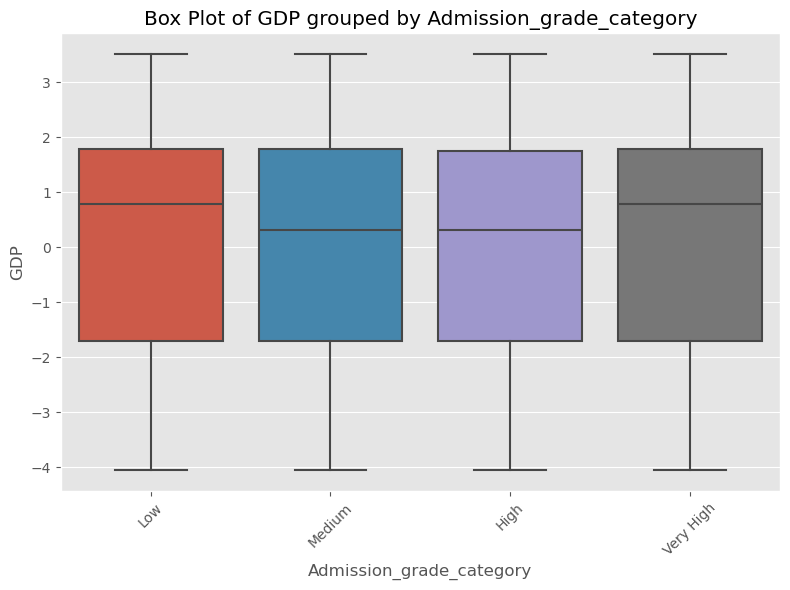

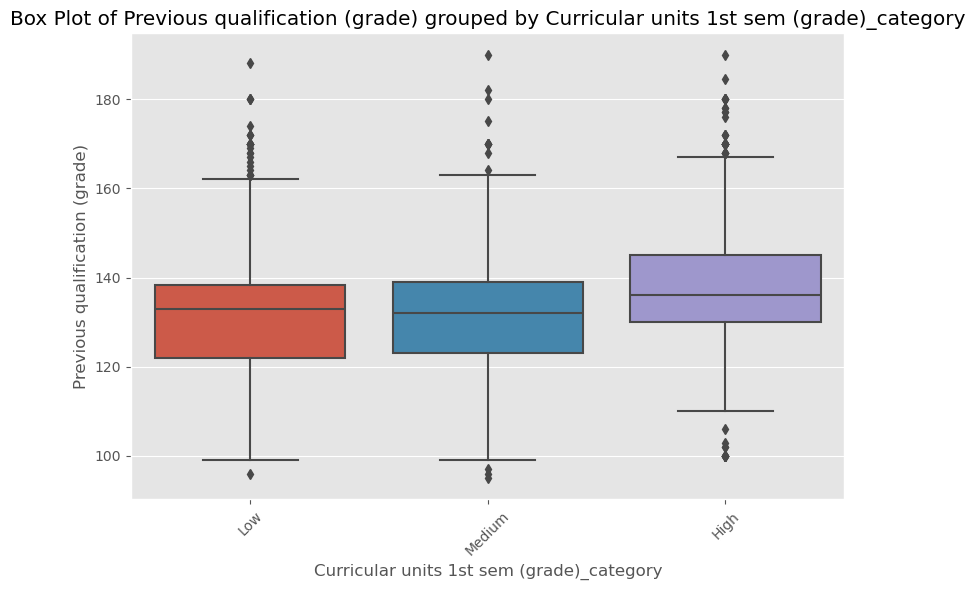

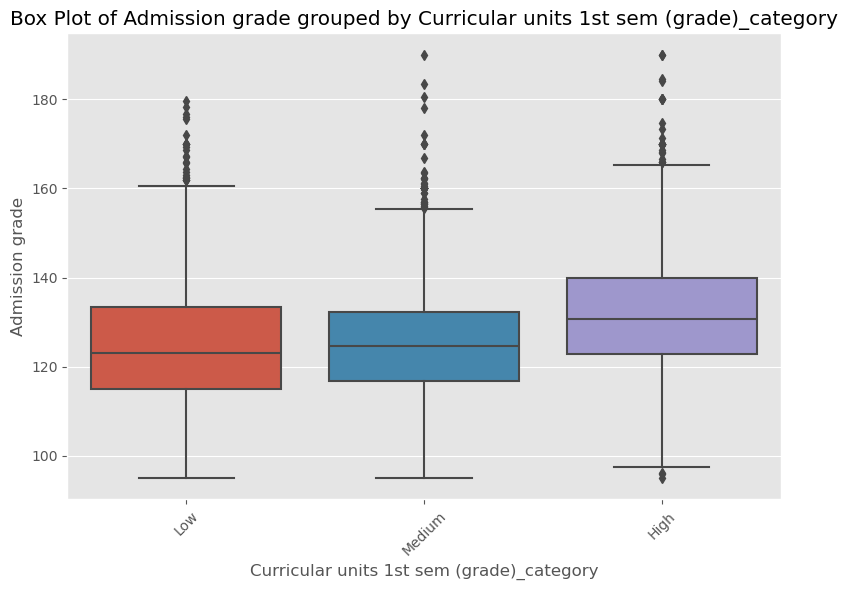

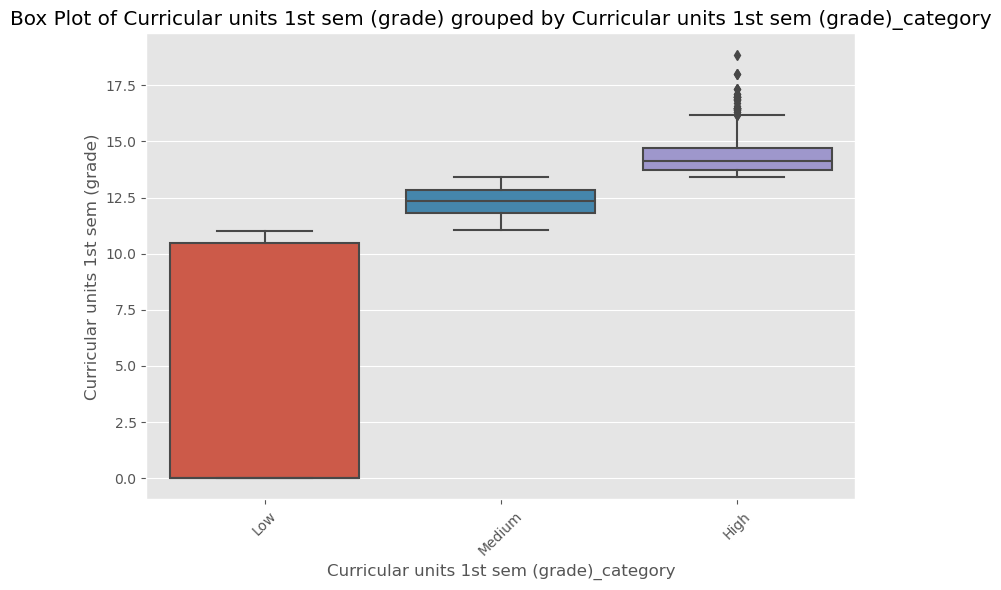

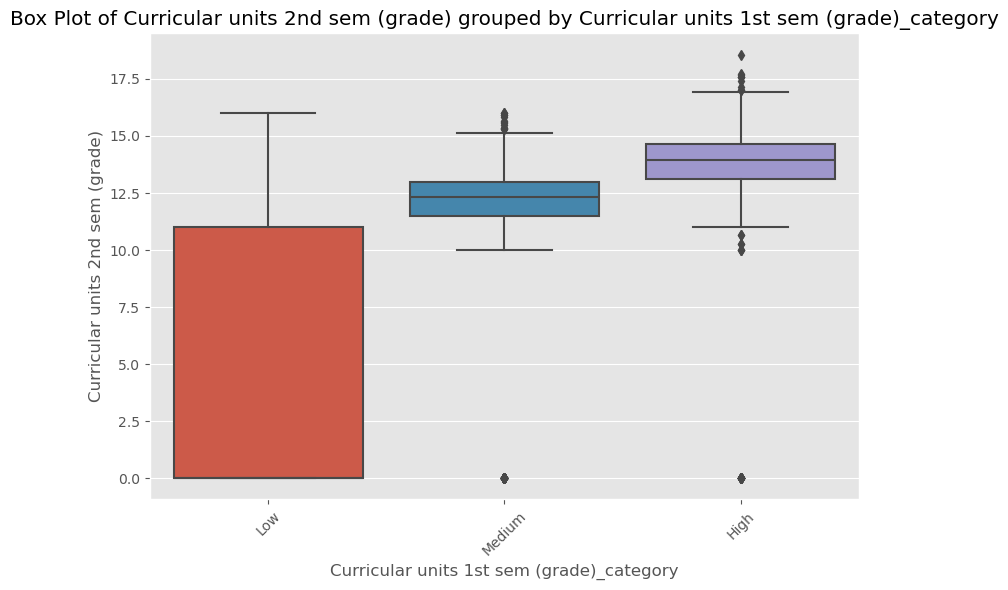

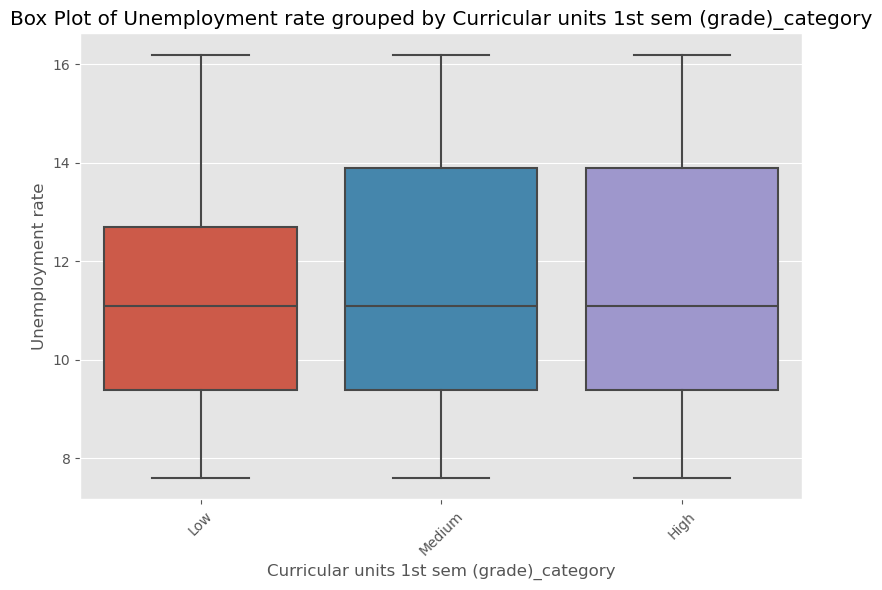

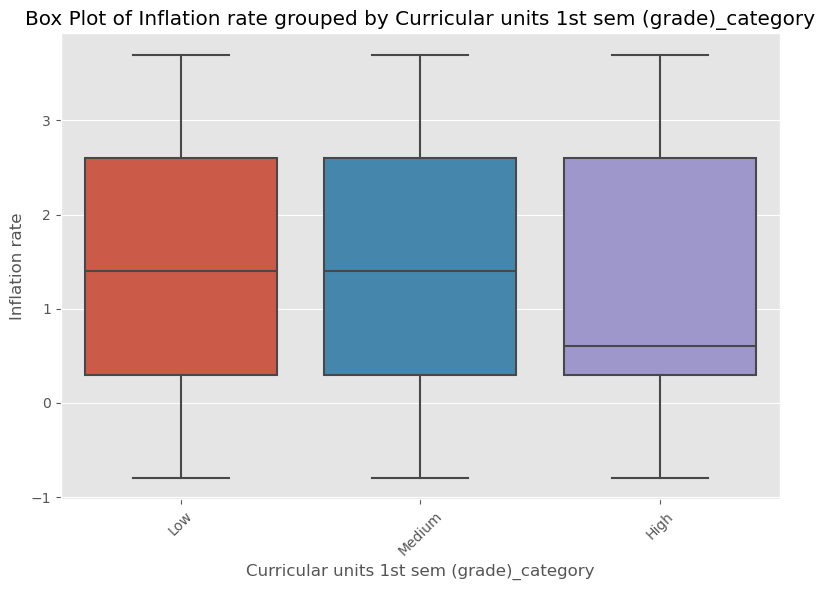

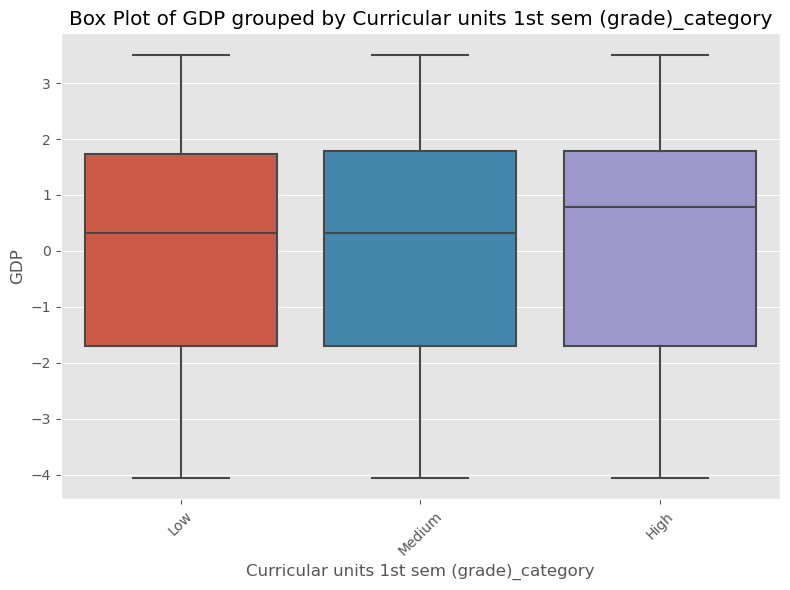

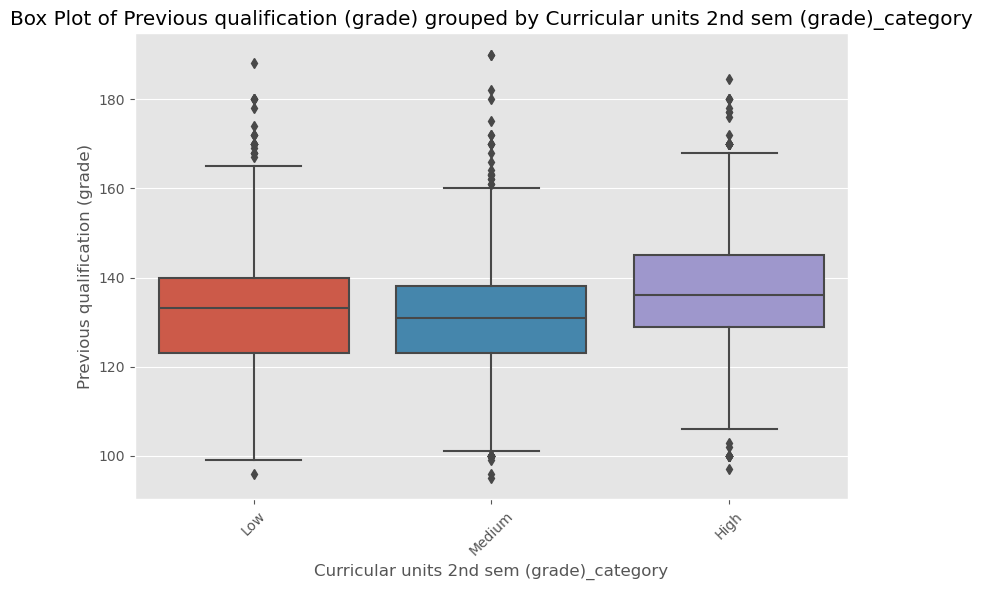

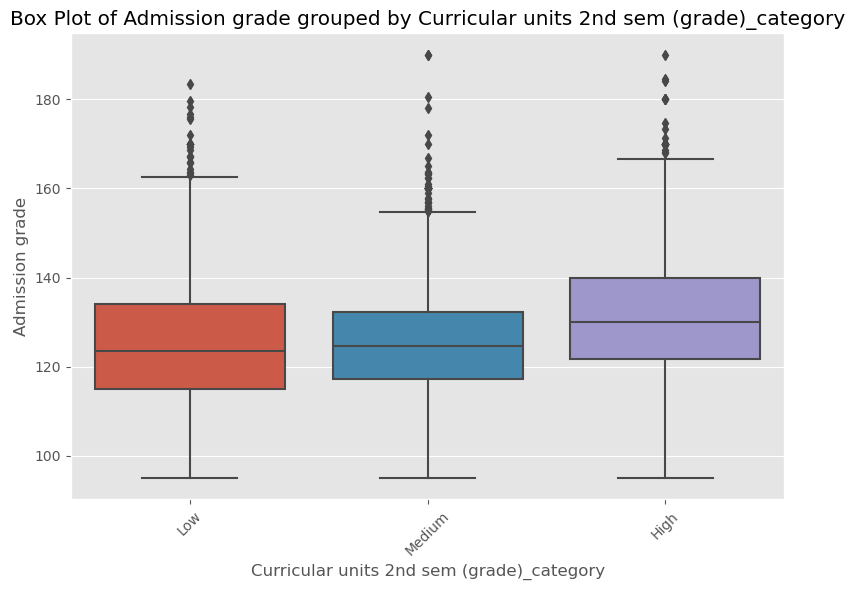

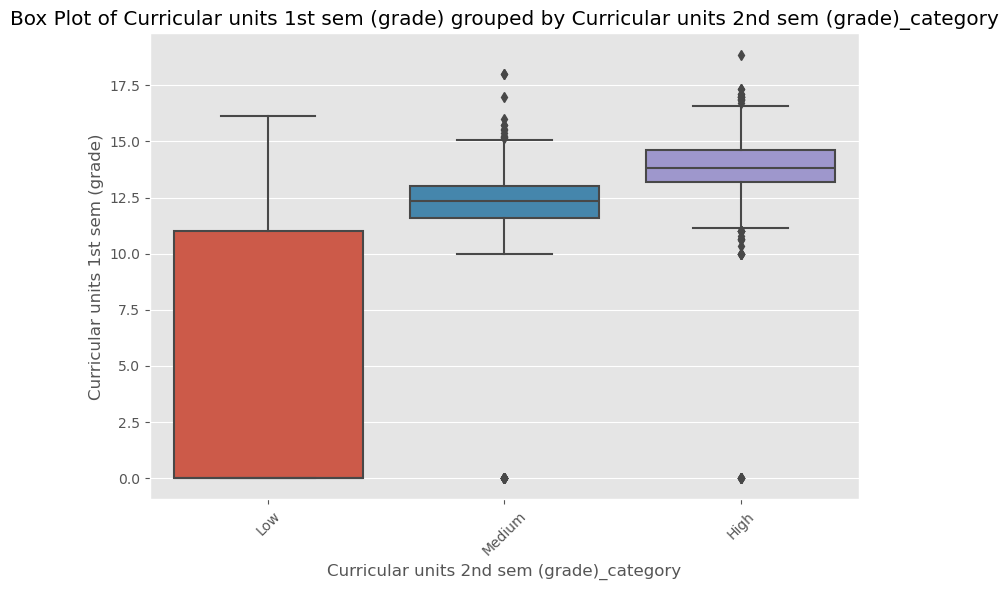

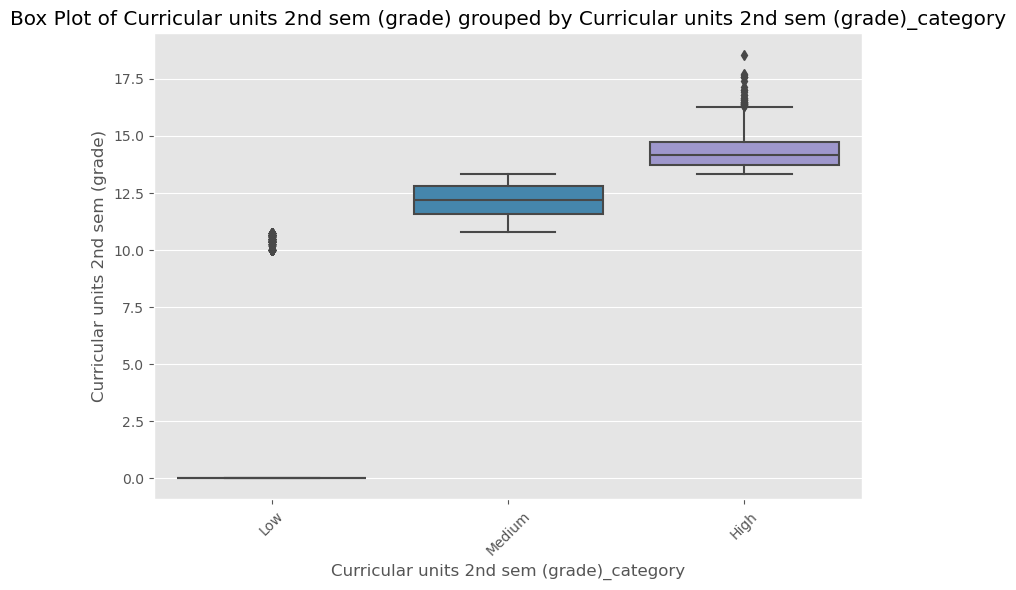

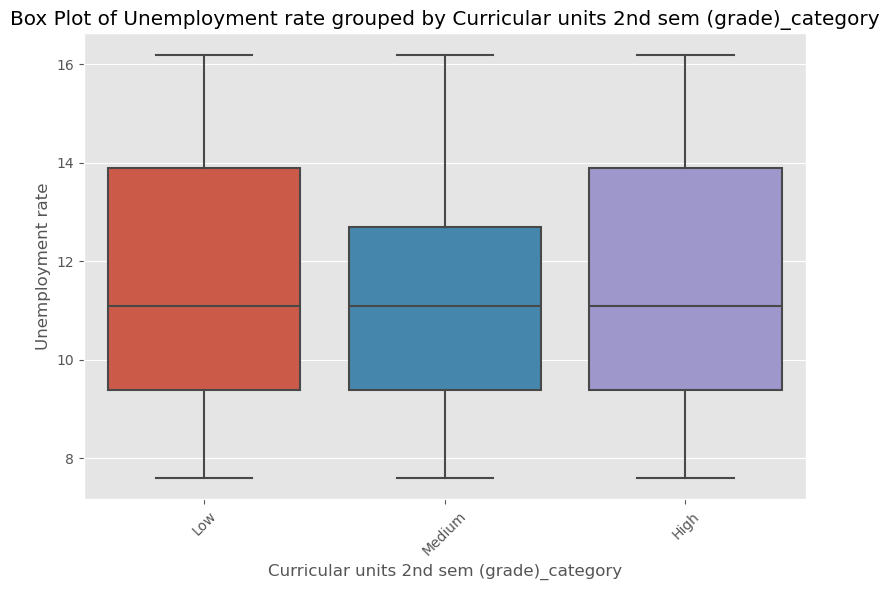

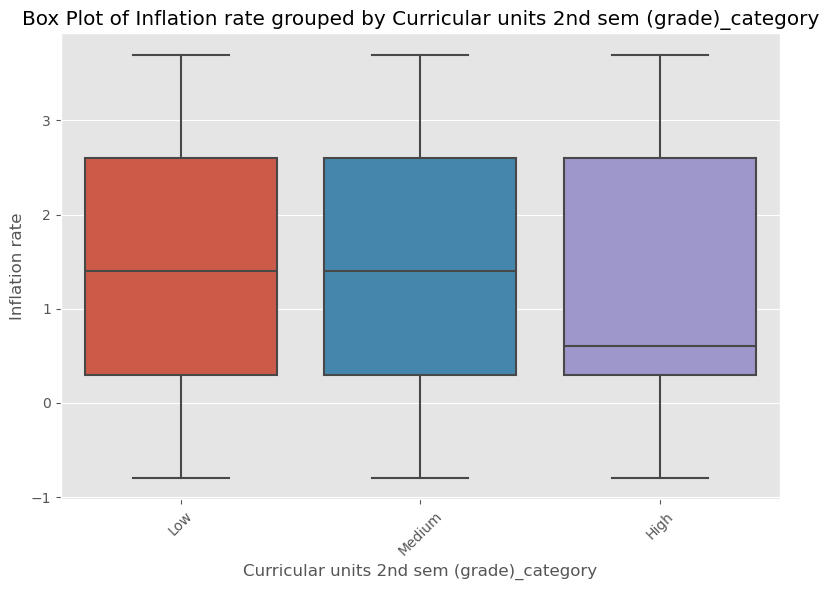

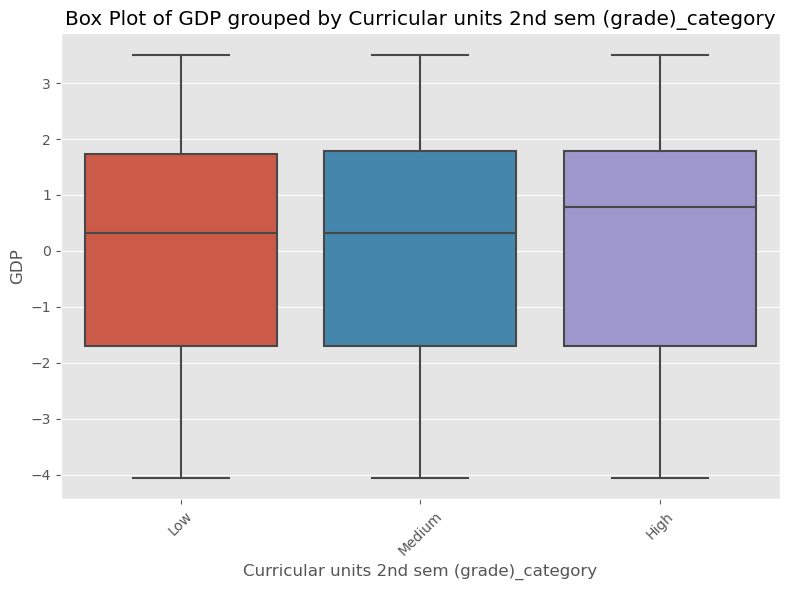

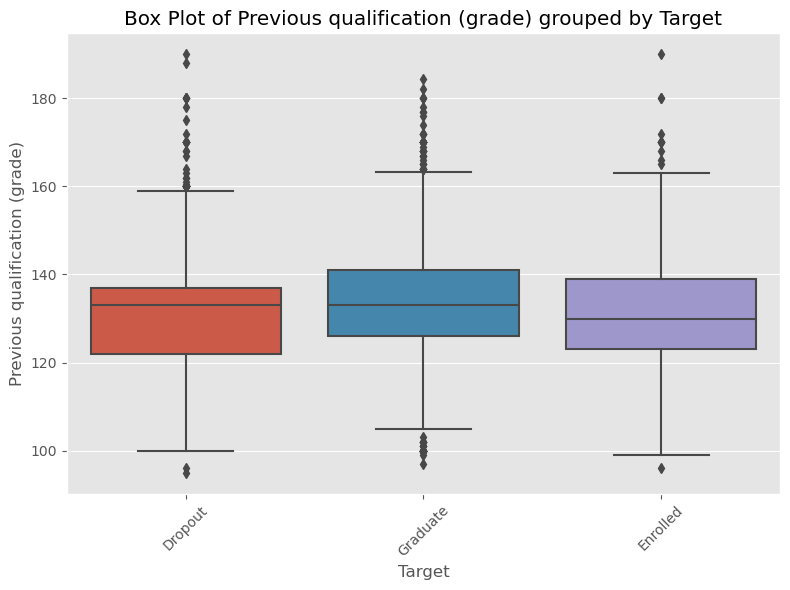

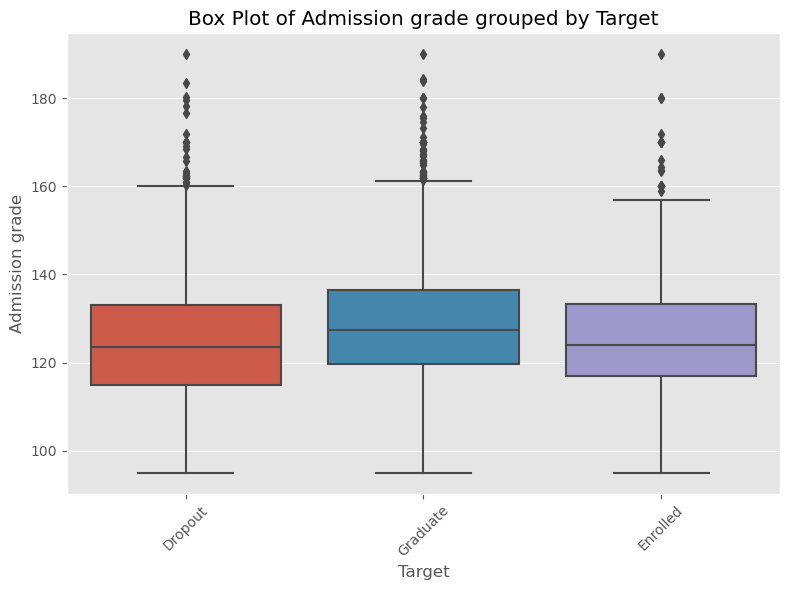

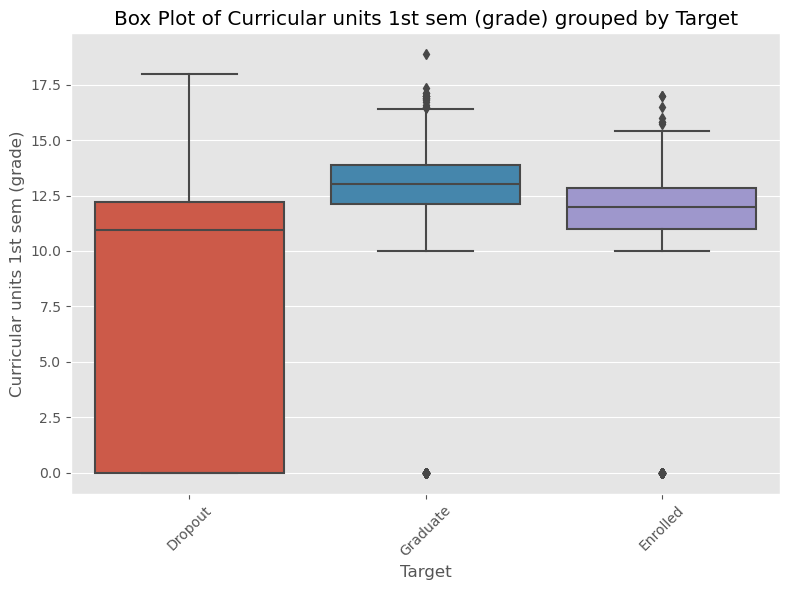

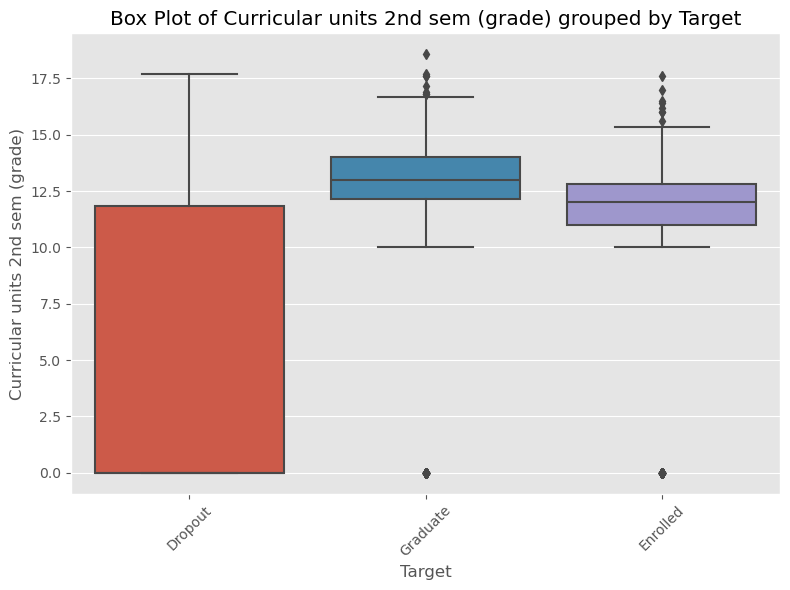

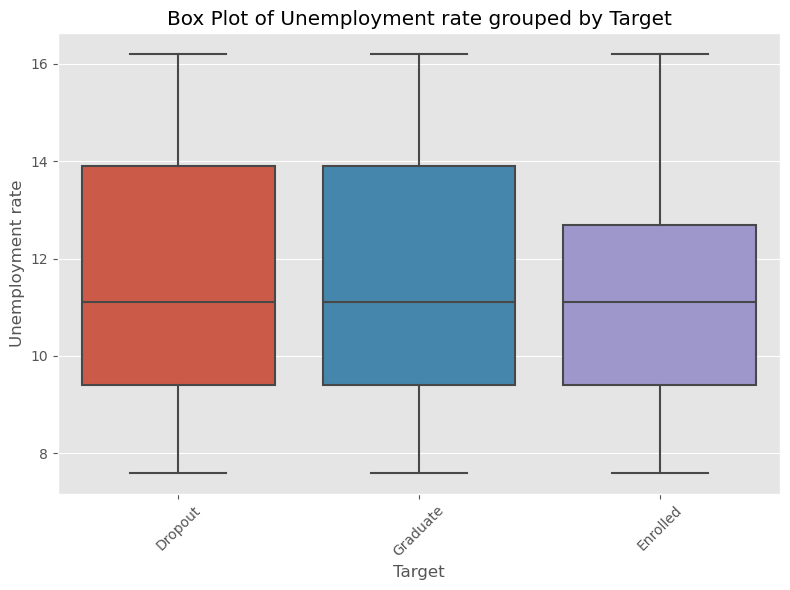

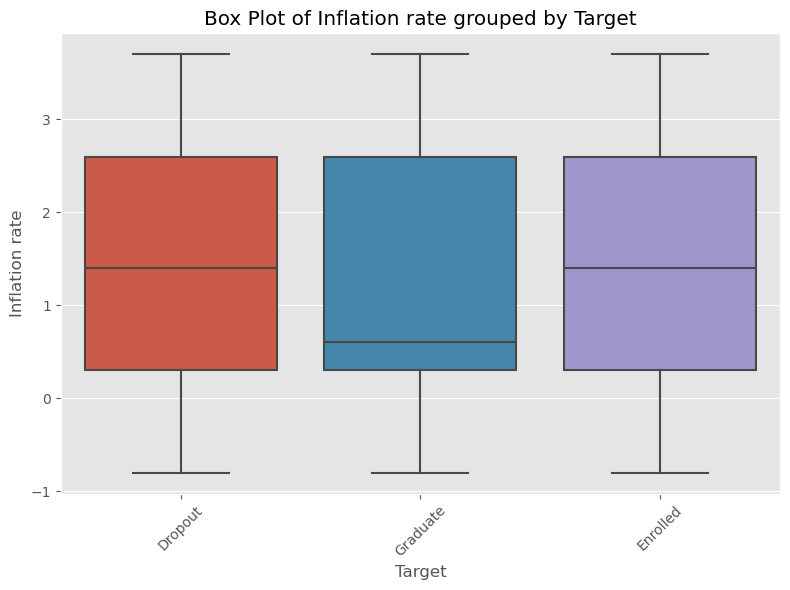

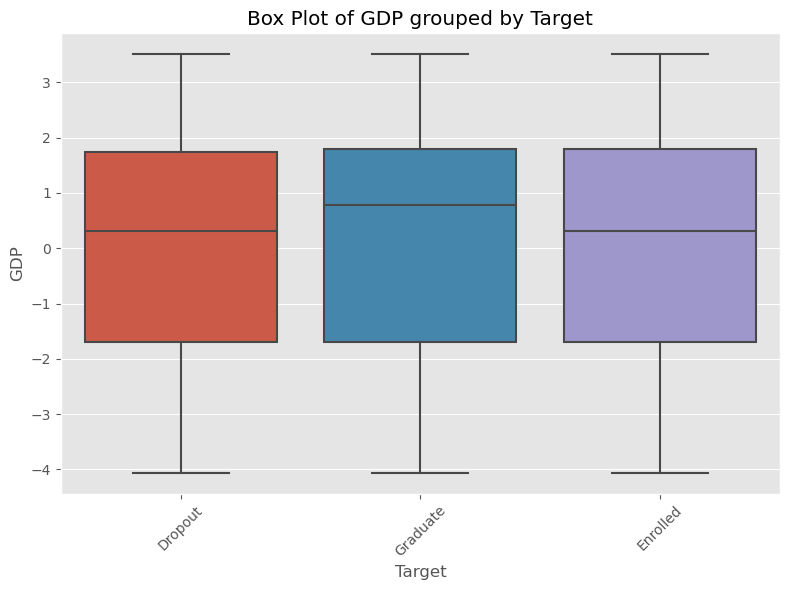

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of categorical and numerical columns
categorical_columns = [
    'Admission_grade_category', 
    'Curricular units 1st sem (grade)_category', 
    'Curricular units 2nd sem (grade)_category',
    'Target'  # Include the Target column
]

numerical_columns = [
    'Previous qualification (grade)', 
    'Admission grade', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (grade)', 
    'Unemployment rate', 
    'Inflation rate', 
    'GDP'
]

# Loop through each categorical column
for cat_col in categorical_columns:
    # Loop through each numerical column and create box plot
    for num_col in numerical_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=cat_col, y=num_col, data=df2)
        
        # Customize the plot
        plt.title(f'Box Plot of {num_col} grouped by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        
        # Show the plot
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

****The box plot shows that dropouts have a median admission grade of around 120, indicating that lower grades are linked to higher dropout rates. However, some high-performing students also drop out, suggesting that factors beyond academics influence their decisions. Addressing these issues is essential for improving student retention.****

In [39]:
df2.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [40]:
df2.select_dtypes(include=['number']).columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [41]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of your categorical columns
categorical_columns = [
    'Target',
    'Admission_grade_category',
    'Curricular units 1st sem (grade)_category',
    'Curricular units 2nd sem (grade)_category',
    'Unemployment_rate_category',
    'Inflation_rate_category',
    'GDP_category',
    'Age_category'
]

# Function to perform chi-square test for each pair of categorical variables
def chi_square_test(df, cat_columns):
    chi2_results = []
    
    for i in range(len(cat_columns)):
        for j in range(i+1, len(cat_columns)):
            var1 = cat_columns[i]
            var2 = cat_columns[j]
            
            # Create a contingency table for the two variables
            contingency_table = pd.crosstab(df[var1], df[var2])
            
            # Perform chi-square test
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            
            # Store the result in a list
            chi2_results.append({
                'Variable 1': var1,
                'Variable 2': var2,
                'Chi-square Statistic': chi2,
                'p-value': p,
                'Degrees of Freedom': dof
            })
    
    return pd.DataFrame(chi2_results)

# Perform chi-square test on df2 with your categorical variables
chi2_results_df = chi_square_test(df2, categorical_columns)

# Display the results where p-value is less than 0.05 (indicating significant association)
significant_results = chi2_results_df[chi2_results_df['p-value'] < 0.05]
significant_results

Variable 1  \
0                                      Target   
1                                      Target   
2                                      Target   
3                                      Target   
4                                      Target   
5                                      Target   
6                                      Target   
7                    Admission_grade_category   
8                    Admission_grade_category   
9                    Admission_grade_category   
10                   Admission_grade_category   
11                   Admission_grade_category   
12                   Admission_grade_category   
13  Curricular units 1st sem (grade)_category   
15  Curricular units 1st sem (grade)_category   
16  Curricular units 1st sem (grade)_category   
17  Curricular units 1st sem (grade)_category   
19  Curricular units 2nd sem (grade)_category   
20  Curricular units 2nd sem (grade)_category   
21  Curricular units 2nd sem (grade)_category   
22                 Unemployment_rate_category   
23                 Unemployment_rate_category   
25                    Inflation_rate_category   
26                    Inflation_rate_category   
27                               GDP_category   

                                   Variable 2  Chi-square Statistic  \
0                    Admission_grade_category             73.138007   
1   Curricular units 1st sem (grade)_category           1093.680956   
2   Curricular units 2nd sem (grade)_category           1533.736589   
3                  Unemployment_rate_category              6.228051   
4                     Inflation_rate_category              7.506589   
5                                GDP_category             17.094025   
6                                Age_category            444.169998   
7   Curricular units 1st sem (grade)_category            211.805547   
8   Curricular units 2nd sem (grade)_category            164.084526   
9                  Unemployment_rate_category             22.757684   
10                    Inflation_rate_category             14.858283   
11                               GDP_category             22.963681   
12                               Age_category            165.308786   
13  Curricular units 2nd sem (grade)_category           3214.207725   
15                    Inflation_rate_category             24.275094   
16                               GDP_category             37.564282   
17                               Age_category            188.678417   
19                    Inflation_rate_category             18.625730   
20                               GDP_category             44.805410   
21                               Age_category            189.642918   
22                    Inflation_rate_category            143.998332   
23                               GDP_category             70.668811   
25                               GDP_category           1893.667266   
26                               Age_category             10.462911   
27                               Age_category             33.159950   

          p-value  Degrees of Freedom  
0    9.273006e-14                   6  
1   1.773585e-235                   4  
2    0.000000e+00                   4  
3    4.442177e-02                   2  
4    2.344040e-02                   2  
5    1.941242e-04                   2  
6    7.910080e-95                   4  
7    5.807587e-43                   6  
8    8.074753e-33                   6  
9    4.536238e-05                   3  
10   1.941849e-03                   3  
11   4.109308e-05                   3  
12   4.442862e-33                   6  
13   0.000000e+00                   4  
15   5.354642e-06                   2  
16   6.966582e-09                   2  
17   1.019234e-39                   4  
19   9.025558e-05                   2  
20   1.864785e-10                   2  
21   6.324502e-40                   4  
22   3.555949e-33                   1  
23   4.225197e-17                

#### ****Summary of Chi-Square Results Related to Dropout****

- **Academic Performance**:
  - **Admission_grade_category**: Strong relationship with dropout (Chi-square = 73.14, p < 0.001). Lower admission grades increase dropout risk.
  - **Curricular units 1st sem (grade)_category**: Extremely strong association (Chi-square = 1093.68, p < 0.001). Poor first-semester performance predicts higher dropout.
  - **Curricular units 2nd sem (grade)_category**: Similar strong link (Chi-square = 1533.74, p < 0.001). Consistently poor grades lead to a higher dropout risk.

- **Economic Factors**:
  - **Unemployment_rate_category** (Chi-square = 6.23, p = 0.044), **Inflation_rate_category** (Chi-square = 7.51, p = 0.023), and **GDP_category** (Chi-square = 17.09, p < 0.001) all show that poor economic conditions increase the likelihood of dropout.

- **Age_category**:
  - Strong relationship (Chi-square = 444.17, p < 0.001). Certain age groups are more likely to drop out, likely due to external pressures or responsibilities.

#### ****Conclusion****
- **Primary Driver**: Academic performance is the strongest predictor of dropout, especially poor semester grades.
- **Secondary Factors**: Economic conditions and age also contribute to higher dropout risks.

#### ****Multivariate Analysis****

****Creating Pair Plots****
```
Pair plots are useful for visualizing relationships between pairs of variables in a dataset. 

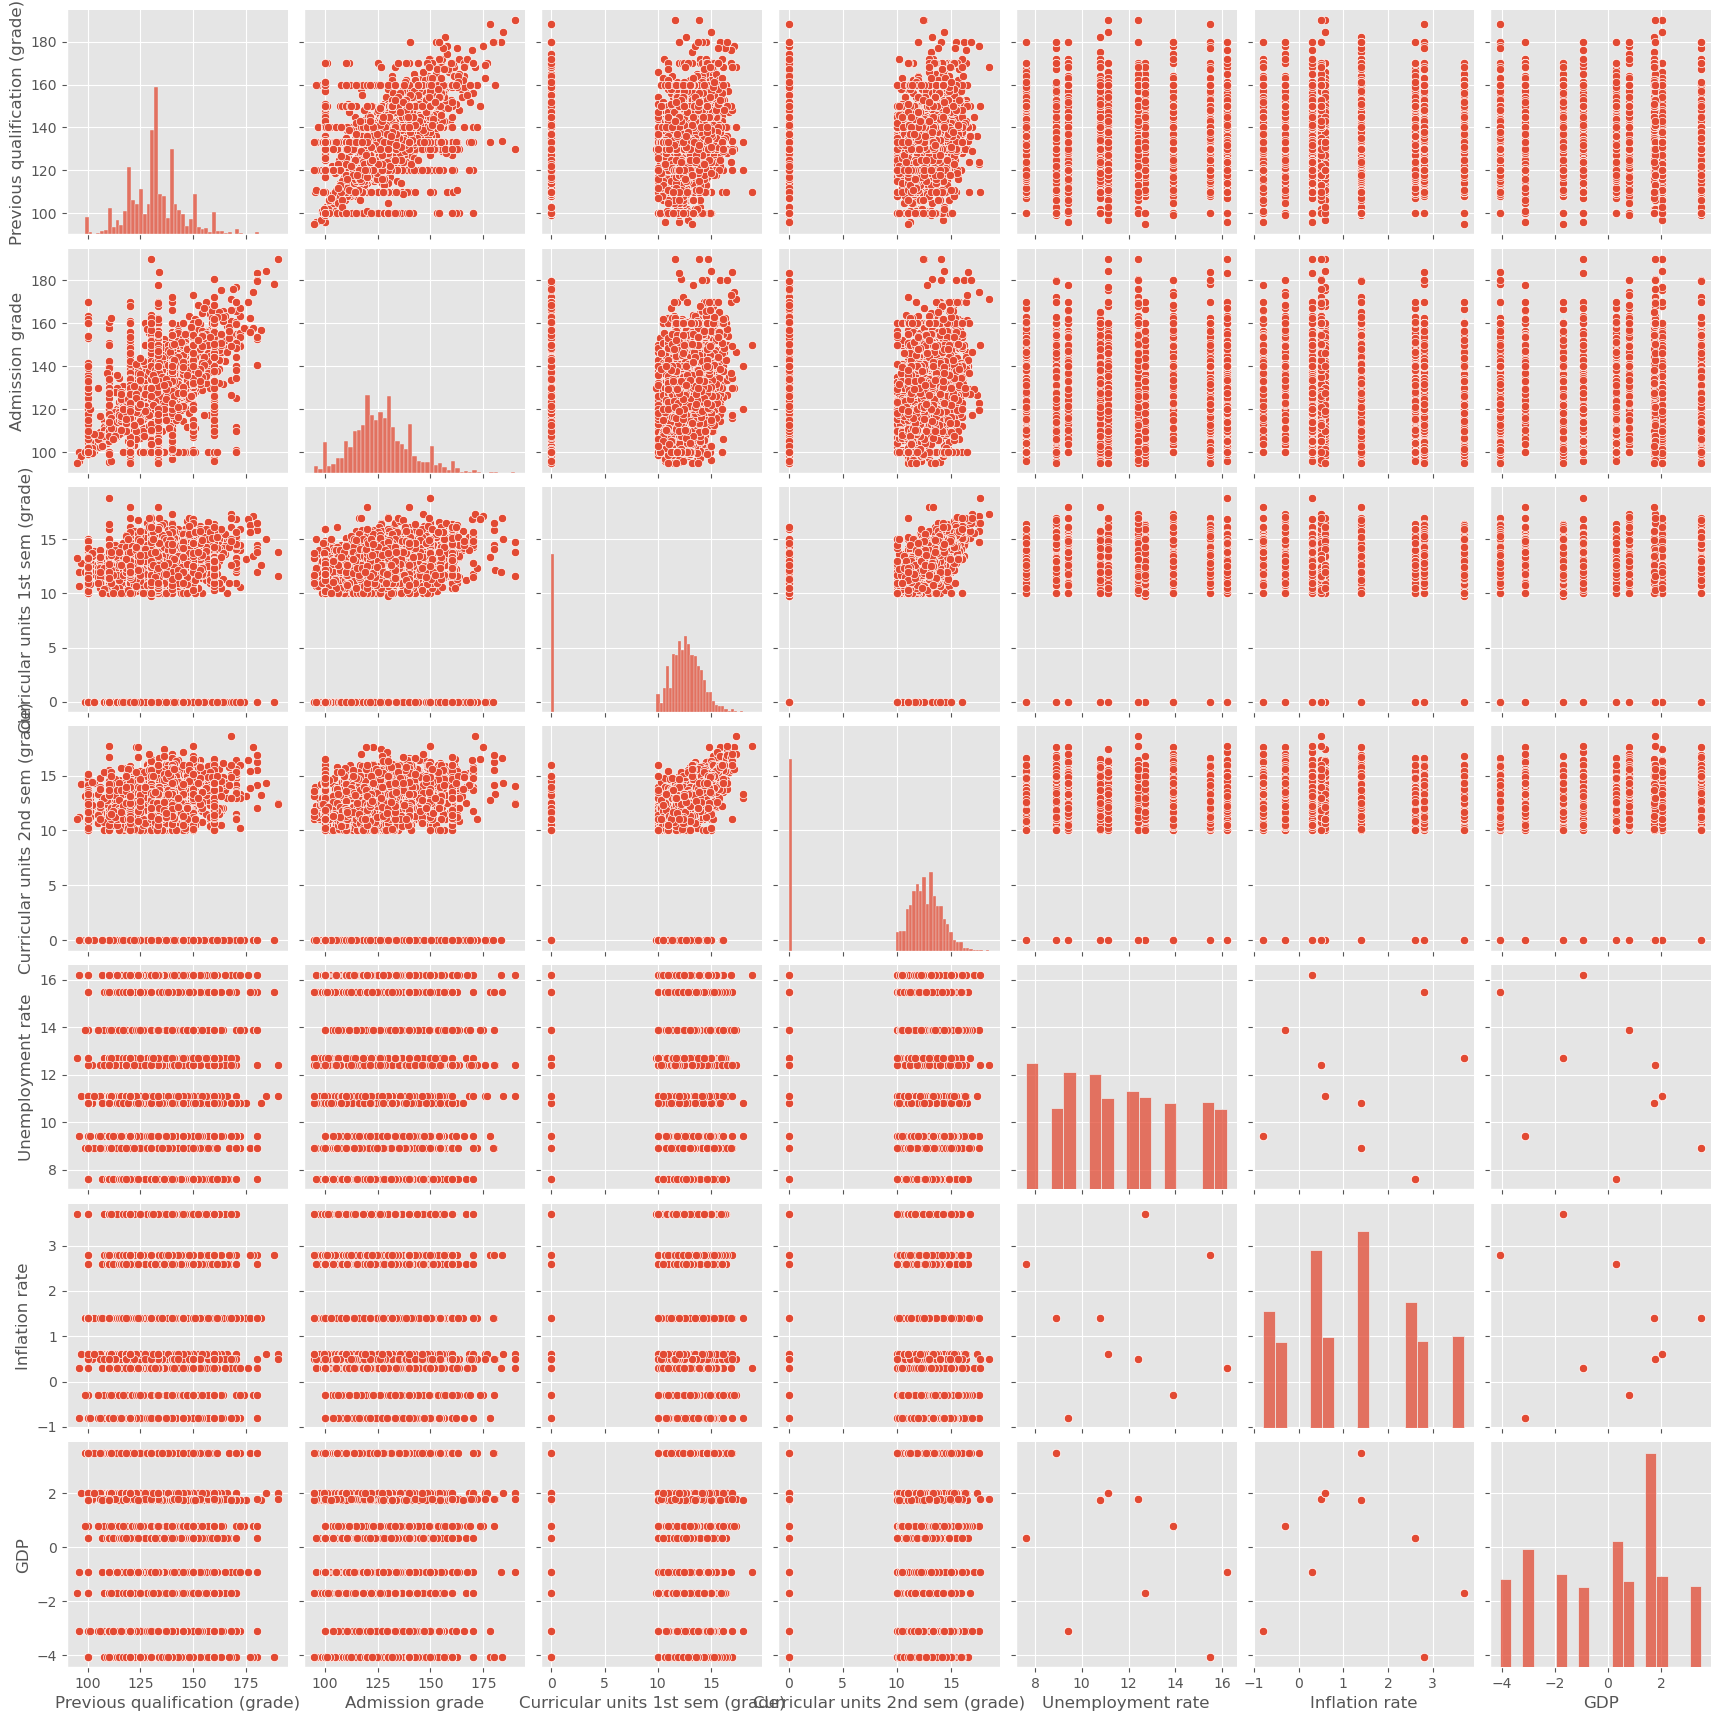

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for the pair plot
pairplot_cols = [
    'Previous qualification (grade)', 
    'Admission grade', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (grade)', 
    'Unemployment rate', 
    'Inflation rate', 
    'GDP'
]

# Create pair plot
sns.pairplot(df2[pairplot_cols])
plt.show()



## Key Findings
- **Higher Admission Grades**: Strongly correlate with better academic outcomes, potentially reducing dropout rates.
- **Economic Stability**: Higher GDP and lower unemployment create a supportive environment for students, further decreasing the likelihood of d.ention.


****Perform and Visualize Principal Component Analysis (PCA)****
```
PCA is a dimensionality reduction technique that can help to visualize the data in a lower-dimensional space.

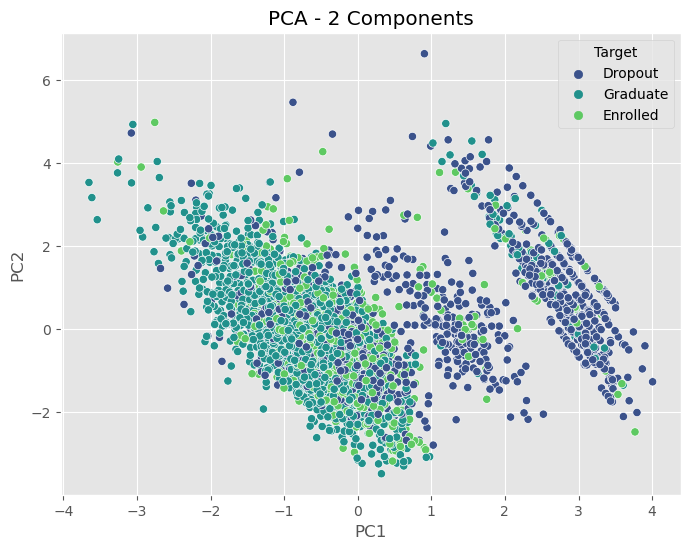

Explained variance ratio: [0.27145275 0.22386039]


In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numerical columns for PCA
pca_cols = [
    'Previous qualification (grade)', 
    'Admission grade', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (grade)', 
    'Unemployment rate', 
    'Inflation rate', 
    'GDP'
]

# Standardize the data before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2[pca_cols])

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Add the Target column to color the data points by class
pca_df['Target'] = df2['Target']

# Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=pca_df, palette='viridis')
plt.title('PCA - 2 Components')
plt.show()

# Explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

> ****The PCA plot highlights how the characteristics of students relate to their likelihood of dropping out. The distinct clustering of the **Dropout** category suggests that these students share specific traits or behaviors that set them apart from those who graduate or remain enrolled. By analyzing the regions occupied by the dropout group in the PCA space, educators can identify key factors contributing to dropout rates, enabling targeted interventions and support strategies to address the needs of at-risk students.****


Create Parallel Coordinates Plot
```
Parallel coordinates plot is useful for visualizing multivariate data by plotting each observation as a line that connects multiple variables.

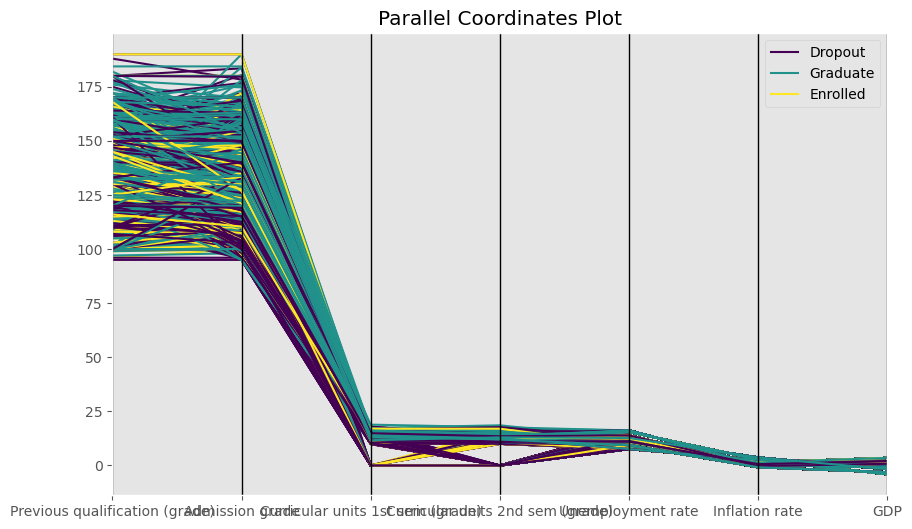

In [44]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# Select columns for parallel coordinates
parallel_cols = [
    'Previous qualification (grade)', 
    'Admission grade', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (grade)', 
    'Unemployment rate', 
    'Inflation rate', 
    'GDP',
    'Target'  # Categorical column to group by
]

# Create parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(df2[parallel_cols], class_column='Target', colormap='viridis')
plt.title('Parallel Coordinates Plot')
plt.show()

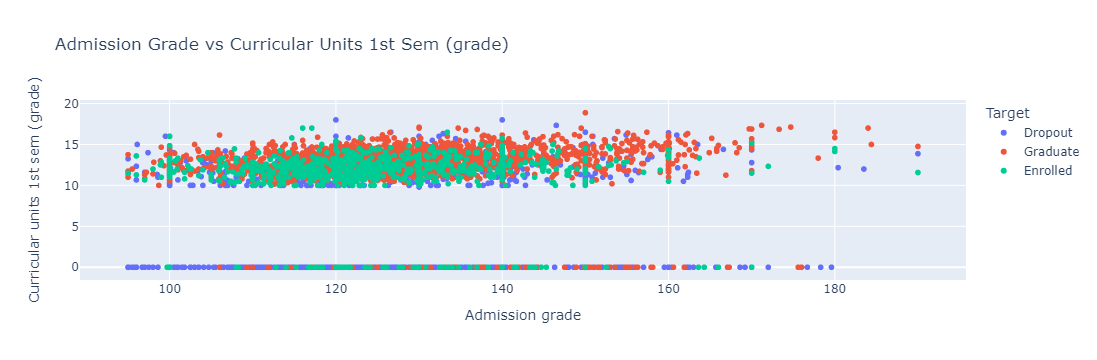

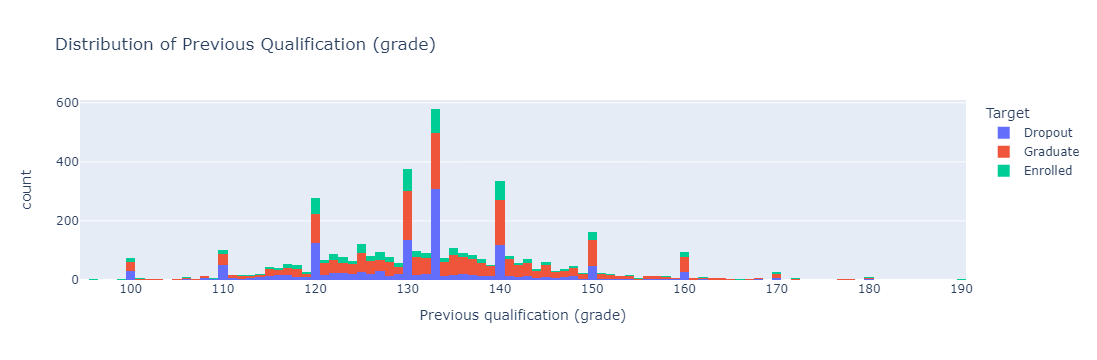

In [45]:
import plotly.express as px
import pandas as pd

# df2 with numerical columns
numerical_cols = df2.select_dtypes(include=['number']).columns

# Interactive scatter plot using Plotly
fig_scatter = px.scatter(df2, x='Admission grade', y='Curricular units 1st sem (grade)', 
                         color='Target', title="Admission Grade vs Curricular Units 1st Sem (grade)")
fig_scatter.show()

# Interactive histogram using Plotly
fig_hist = px.histogram(df2, x='Previous qualification (grade)', color='Target', 
                        title="Distribution of Previous Qualification (grade)")
fig_hist.show()

In [46]:
df2.select_dtypes(include=['category', 'object']).columns.tolist()

['Target',
 'Admission_grade_category',
 'Curricular units 1st sem (grade)_category',
 'Curricular units 2nd sem (grade)_category',
 'Unemployment_rate_category',
 'Inflation_rate_category',
 'GDP_category',
 'Age_category']

In [47]:
df2.select_dtypes(include=np.number).columns.tolist()

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nationality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation r

In [48]:
df2.to_csv('dropout.csv', index=False)

2024-09-20 11:53:11.324 
  command:

    streamlit run C:\Users\Andy Joseph\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-09-20 11:53:11.328 No runtime found, using MemoryCacheStorageManager
2024-09-20 11:53:11.334 No runtime found, using MemoryCacheStorageManager


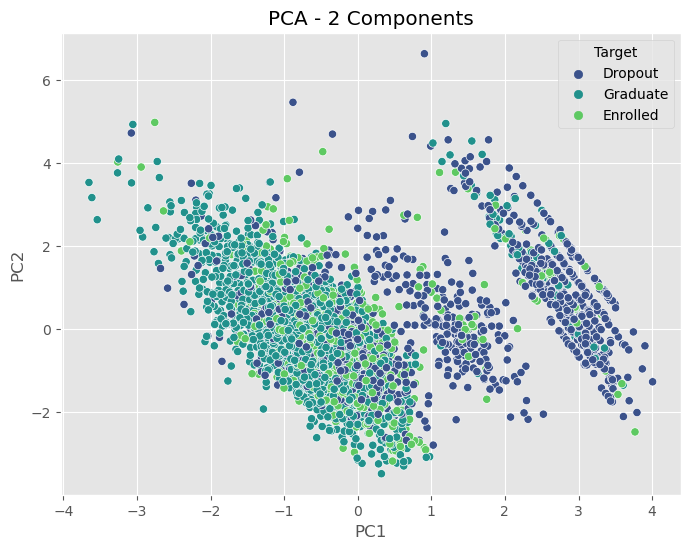

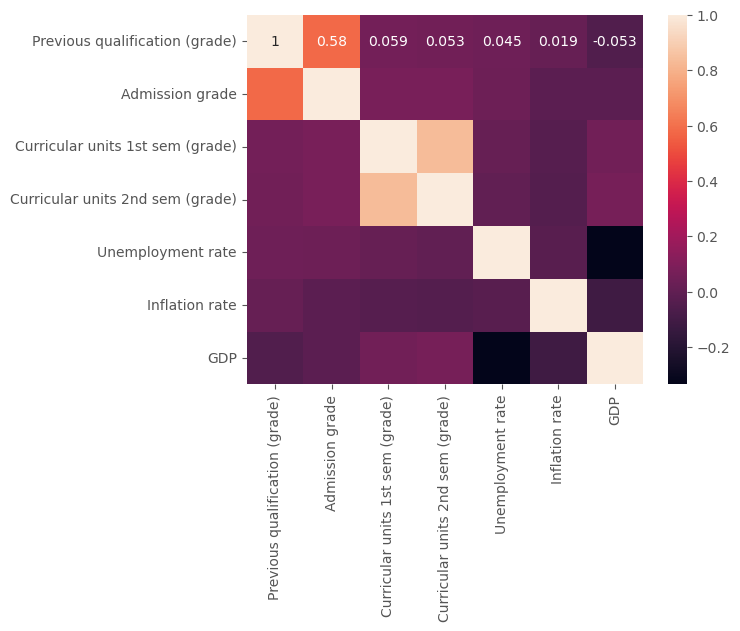

In [49]:
import streamlit as st
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set up custom CSS for a beautiful background
page_bg_img = '''
<style>
    body {
        background-image: url("https://img.freepik.com/free-vector/abstract-big-data-technology-concept-background-design_1017-22911.jpg");
        background-size: cover;
    }
    .stApp {
        background: rgba(255, 255, 255, 0.9);  /* Optional: Light background on content */
    }
</style>
'''

# Apply the background image using custom HTML
st.markdown(page_bg_img, unsafe_allow_html=True)

# Load data
@st.cache_data
def load_data():
    data = pd.read_csv('dropout.csv')
    return data

df2 = load_data()

# Sidebar for filters
st.sidebar.header('Filter Options')

# Dropdown (selectbox) for Target filter with 'None' option to cancel selection
selected_target = st.sidebar.selectbox('Select Target:', ['None'] + list(df2['Target'].unique()))

# Dropdown for Age Category filter with 'None' option
selected_age_category = st.sidebar.selectbox('Select Age Category:', ['None'] + list(df2['Age_category'].unique()))

# Dropdown for Curricular Units 1st Sem Grade Category filter with 'None' option
selected_units1st_sem_category = st.sidebar.selectbox('Select Curricular Units 1st Sem (Grade) Category:', 
                                                      ['None'] + list(df2['Curricular units 1st sem (grade)_category'].unique()))

# Dropdown for Curricular Units 2nd Sem Grade Category filter with 'None' option
selected_units2nd_sem_category = st.sidebar.selectbox('Select Curricular Units 2nd Sem (Grade) Category:', 
                                                      ['None'] + list(df2['Curricular units 2nd sem (grade)_category'].unique()))

# Apply filters based on the dropdown selections
filtered_data = df2.copy()

if selected_target != 'None':
    filtered_data = filtered_data[filtered_data['Target'] == selected_target]

if selected_age_category != 'None':
    filtered_data = filtered_data[filtered_data['Age_category'] == selected_age_category]

if selected_units1st_sem_category != 'None':
    filtered_data = filtered_data[filtered_data['Curricular units 1st sem (grade)_category'] == selected_units1st_sem_category]

if selected_units2nd_sem_category != 'None':
    filtered_data = filtered_data[filtered_data['Curricular units 2nd sem (grade)_category'] == selected_units2nd_sem_category]

# Dashboard visuals
st.title('Interactive Data Dashboard')

# PCA Analysis and Visualization
# Select numerical columns for PCA
pca_cols = [
    'Previous qualification (grade)', 
    'Admission grade', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (grade)', 
    'Unemployment rate', 
    'Inflation rate', 
    'GDP'
]

# Standardize the data before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data[pca_cols])

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Add the Target column to color the data points by class
pca_df['Target'] = filtered_data['Target']

# Plot the PCA results
st.subheader('PCA - 2 Components')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=pca_df, palette='viridis')
plt.title('PCA - 2 Components')
st.pyplot(plt)

# Display explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
st.write(f"Explained variance ratio: {explained_variance_ratio}")

# Plot Admission Grade vs Target
st.subheader('Bar Chart: Admission Grade vs Target')
fig_bar = px.bar(filtered_data, x='Admission grade', y='Target', 
                 color='Target', title="Admission Grade vs Target")
st.plotly_chart(fig_bar)

# Scatter Plot: Admission Grade vs Curricular Units 1st Sem (Grade)
st.subheader('Scatter Plot: Admission Grade vs Curricular Units 1st Sem (Grade)')
fig_scatter = px.scatter(filtered_data, x='Admission grade', y='Curricular units 1st sem (grade)', 
                         color='Target', title="Admission Grade vs Curricular Units 1st Sem (Grade)")
st.plotly_chart(fig_scatter)

# Correlation Heatmap
numeric_columns = ['Previous qualification (grade)', 'Admission grade', 
                   'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 
                   'Unemployment rate', 'Inflation rate', 'GDP']
filtered_numeric_data = filtered_data[numeric_columns]

st.subheader('Correlation Heatmap')
fig, ax = plt.subplots()
sns.heatmap(filtered_numeric_data.corr(), annot=True, ax=ax)
st.pyplot(fig)

# Display filtered data
st.subheader('Filtered Data')
st.write(filtered_data)


In [50]:
from pyngrok import ngrok

# Set your ngrok authentication token
ngrok.set_auth_token('2dDbjYYyY4pLejo8KTN5EqL1hri_5NecrBesVNEP8Sk6RHGut')

# Connect to ngrok with authentication
public_url = ngrok.connect(8501)
public_url

<NgrokTunnel: "https://5be4-102-216-201-31.ngrok-free.app" -> "http://localhost:8501">